<a href="https://colab.research.google.com/github/Bocampagni/UFRJ/blob/master/artificialInteligente/algoritmo_gen%C3%A9tico_N_rainhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Genético
**Fábio A. Bocampagni, Thiago Figueiredo Lopes de Castro (118090044)**


O problema das N-rainhas consiste em encontrar todas as combinações possíveis de N rainhas num tabuleiro de dimensão N por N tal que nenhuma das rainhas ataque qualquer outra. Duas rainhas atacam-se uma à outra quando estão na mesma linha, na mesma coluna ou na mesma diagonal do tabuleiro.

Algoritmos Genéticos são inspirados no princípio
Darwiniano da evolução das espécies e na genética.

São algoritmos probabilísticos que fornecem
um mecanismo de busca paralela e adaptativa
baseado no princípio de sobrevivência dos mais
aptos e na reprodução. 

# 1. Modelagem

Um tabuleiro é representado como uma lista de N espaços, onde cada espaço representa a dama em uma das N colunas, respectivamente.
E cada espaço contém um inteiro de 0 a N - 1, representando a linha em que ela está.

Ex.:
```
4 damas:
    Dama 1 na linha 2
    Dama 2 na linha 3
    Dama 3 na linha 4
    Dama 4 na linha 1
    Lista: [1, 2, 3, 0]

    Os índices são reduzidos em 1, para facilitar acesso à lista.
```

# 2. Implementação Base

### A)

In [ ]:
import random
import matplotlib.pyplot as plt


def tabuleiro(N, Q):
    tabuleiros = []

    for i in range(0, Q):
        tabuleiro = []

        tabuleiro = [random.randint(0, N - 1) for j in range(0, N)]

        tabuleiros.append(tabuleiro)

    return tabuleiros


### B)

In [ ]:
def todosVizinhos(T):
    nDamas = len(T)     # Obtém a quantidade de damas no tabuleiro

    tabuleirosNovos = []

    for i in range(0, nDamas):
        posicoes = {j for j in range(0, nDamas)}    # Utiliza-se conjunto para remoção devido à complexidade de tempo O(1)

        posicoes.remove(T[i]) # Remove a posição dessa dama, já que seria igual ao tabuleiro recebido

        for j in posicoes: # Movimenta a dama dessa coluna por todas as posições exceto a atual dela
            aux = T[:]
            aux[i] = j
            tabuleirosNovos.append(aux)

    
    return tabuleirosNovos

In [ ]:
for board in todosVizinhos([0, 1, 2, 3, 4, 5, 6, 7]):     # Para cada dama, ela é movimentada uma casa exceto a atual
  print(board)

print(len(todosVizinhos([0, 1, 2, 3, 4, 5, 6, 7])))     # Para esse tabuleiro, devemos ter 8 * 7 = 56 possibilidades, se movimentarmos uma dama por vez

[1, 1, 2, 3, 4, 5, 6, 7]
[2, 1, 2, 3, 4, 5, 6, 7]
[3, 1, 2, 3, 4, 5, 6, 7]
[4, 1, 2, 3, 4, 5, 6, 7]
[5, 1, 2, 3, 4, 5, 6, 7]
[6, 1, 2, 3, 4, 5, 6, 7]
[7, 1, 2, 3, 4, 5, 6, 7]
[0, 0, 2, 3, 4, 5, 6, 7]
[0, 2, 2, 3, 4, 5, 6, 7]
[0, 3, 2, 3, 4, 5, 6, 7]
[0, 4, 2, 3, 4, 5, 6, 7]
[0, 5, 2, 3, 4, 5, 6, 7]
[0, 6, 2, 3, 4, 5, 6, 7]
[0, 7, 2, 3, 4, 5, 6, 7]
[0, 1, 0, 3, 4, 5, 6, 7]
[0, 1, 1, 3, 4, 5, 6, 7]
[0, 1, 3, 3, 4, 5, 6, 7]
[0, 1, 4, 3, 4, 5, 6, 7]
[0, 1, 5, 3, 4, 5, 6, 7]
[0, 1, 6, 3, 4, 5, 6, 7]
[0, 1, 7, 3, 4, 5, 6, 7]
[0, 1, 2, 0, 4, 5, 6, 7]
[0, 1, 2, 1, 4, 5, 6, 7]
[0, 1, 2, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 4, 5, 6, 7]
[0, 1, 2, 5, 4, 5, 6, 7]
[0, 1, 2, 6, 4, 5, 6, 7]
[0, 1, 2, 7, 4, 5, 6, 7]
[0, 1, 2, 3, 0, 5, 6, 7]
[0, 1, 2, 3, 1, 5, 6, 7]
[0, 1, 2, 3, 2, 5, 6, 7]
[0, 1, 2, 3, 3, 5, 6, 7]
[0, 1, 2, 3, 5, 5, 6, 7]
[0, 1, 2, 3, 6, 5, 6, 7]
[0, 1, 2, 3, 7, 5, 6, 7]
[0, 1, 2, 3, 4, 0, 6, 7]
[0, 1, 2, 3, 4, 1, 6, 7]
[0, 1, 2, 3, 4, 2, 6, 7]
[0, 1, 2, 3, 4, 3, 6, 7]
[0, 1, 2, 3, 4, 4, 6, 7]


### C)

In [ ]:
def umVizinho(T): # Basta gerar todos os tabuleiros possíveis e escolher um deles

    tabuleirosVizinhos = todosVizinhos(T)

    posicaoAleatoria = random.randint(0, len(tabuleirosVizinhos) - 1)

    return tabuleirosVizinhos[posicaoAleatoria]

In [ ]:
print(umVizinho([0, 1, 2, 3, 4, 5, 6, 7]))    # Um dos tabuleiros da execução anterior

[0, 1, 2, 3, 4, 5, 4, 7]


### D)

In [ ]:
def numeroAtaques(T):

    qtdAtaques = 0

    tamTabuleiro = len(T)

    for i in range(0, tamTabuleiro - 1):            # A contagem vai até a (N - 1)-ésima dama, já que ela será analisada pelas outras
        for j in range(i + 1, tamTabuleiro):        # Para não repetir a contagem, basta não olhar para trás dessa dama

            if T[i] == T[j]:            # Ataque na linha
                qtdAtaques += 1

            elif abs(i - j) == abs(T[i] - T[j]):      # Ataque na diagonal
                qtdAtaques += 1

    return qtdAtaques

# Algoritmo genético

O algoritmo genético realiza uma maximização. Logo, se obtivermos a quantidade de ataques no tabuleiro, basta invertermos o valor,
já que queremos o menor número de ataques, até não existir nenhum.

Com isso, quanto menos ataques, mais próximo será o valor de 1.
A função de avaliação será `1 / numeroAtaques(T)`, onde essa é a função definida acima.

Contudo, como podemos não ter ataques no tabuleiro, teremos uma divisão por 0. Para corrigir isso, basta somar 1.

Portanto, a função final é `1 / numeroAtaques(T) + 1`
Quanto mais ataques, mais próximo o número é de 0. Quanto menos ataques, mais próximo de 1.


Escolhemos essa função pela simplicidade da implementação e cálculo, além de que, para tabuleiros com muitos ataques, a função decresce rapidamente.

In [ ]:
def geraPopulacaoInicial(N, qtdIndividuos):
    return tabuleiro(N, qtdIndividuos)

def avaliaTabuleiro(T):
    return 1 / (numeroAtaques(T) + 1)


def constroiRoletaViciada(P):   # Segue o padrão do algoritmo

    roleta = []

    for individuo in P:

        avaliacao = avaliaTabuleiro(individuo)

        roleta.append(avaliacao)

    soma = sum(roleta)

    return roleta, soma

def constroiIntervalosSelecao(roleta):  # Apenas cria uma lista de intervalos, parecidos com construção de frequências em Estatística
    limiteInferior = roleta[0]
    limiteSuperior = roleta[0]

    intervalos = []

    # Coloca o primeiro intervalo, que é 0 e o primeiro valor em roleta

    intervalos.append([0, roleta[0]])

    # Os demais são o teto do último intervalo e esse valor acrescido do atual a ser verificado da roleta

    for avaliacao in roleta[1 : ]:
        limiteSuperior = limiteInferior + avaliacao

        intervalos.append([limiteInferior, limiteSuperior])

        limiteInferior = limiteSuperior

    return intervalos

def realizaSelecao(P):
    populacaoIntermediaria = []

    roleta, soma = constroiRoletaViciada(P)

    intervalosSelecao = constroiIntervalosSelecao(roleta)

    for i in range(0, len(P)):      # Gera uma população de mesmo tamanho, onde um valor sorteado é encaixado nos intervalos da roleta

        intervalo = 0       # Utilizada para sabermos qual cromossomo foi escolhido com base no número sorteado

        numeroSorteado = random.uniform(0, soma)

        for intervalos in intervalosSelecao:
            
            if numeroSorteado >= intervalos[0] and numeroSorteado <= intervalos[1]:
                populacaoIntermediaria.append(P[intervalo])
                break
            
            intervalo += 1

    return populacaoIntermediaria

def realizaCrossover(individuoUm, individuoDois, probabilidade):

    chanceSorteada = random.random()

    individuoUmCrossover = individuoUm

    individuoDoisCrossover = individuoDois

    if chanceSorteada <= probabilidade:

        posicaoCorte = random.randint(0, len(individuoUm) - 1)
    
        individuoUmCrossover =  individuoUm[0 : posicaoCorte] + individuoDois[posicaoCorte : ]
        individuoDoisCrossover =  individuoDois[0 : posicaoCorte] + individuoUm[posicaoCorte : ]

    return individuoUmCrossover, individuoDoisCrossover


def iniciaCrossover(P : list, probabilidade):

    populacaoNova = []

    while len(P) != 0:

        if len(P) == 1:         # No caso em que P tem tamanho ímpar, um tabuleiro não terá um par
            populacaoNova.append(P[0])
            P.pop()
        
        else:

            # Obtém-se um indivíduo, removemos da população e obtemos o próximo. O resultado do crossover é adicionado na população.

            posIndividuoUm = random.randint(0, len(P) - 1)
            individuoUm = P[posIndividuoUm]

            P.pop(posIndividuoUm)

            posIndividuoDois = random.randint(0, len(P) - 1)

            individuoDois = P[posIndividuoDois]

            P.pop(posIndividuoDois)

            individuoUmCrossover, individuoDoisCrossover = realizaCrossover(individuoUm, individuoDois, probabilidade)

            populacaoNova.append(individuoUmCrossover)
            populacaoNova.append(individuoDoisCrossover)


    return populacaoNova

def realizaMutacao(P, chance):

    populacaoNova = []

    for individuo in P:

        chanceSorteada = random.random()

        if chanceSorteada <= chance:

            posicaoSorteada = random.randint(0, len(individuo) - 1)

            individuo[posicaoSorteada] = random.randint(0, len(individuo) - 1)      # Troca essa posição por outra

        populacaoNova.append(individuo)
    
    return populacaoNova

def retornaMelhorIndividuo(P):

    maior = avaliaTabuleiro(P[0])
    pos = 1
    posMelhor = 0
    melhor = P[0]
    somasIndividuos = maior

    for individuo in P[1 : ]:
    
        avaliacao = avaliaTabuleiro(individuo)
        somasIndividuos += avaliacao

        if avaliacao > maior:
            melhor = P[pos]
            posMelhor = pos
            maior = avaliacao

        pos += 1

    return melhor, maior, posMelhor, somasIndividuos


Implementação da função principal do algoritmo genético, seguindo o conceito dele. Realizamos análises e tentativas de implementar threads no programa.
Entretanto, não obtivemos ganho algum, já que o problema da demora da execução
é o número de passos totais, ou seja, a quantidade de gerações.
Como o algoritmo depende da iteração anterior e cada etapa de uma iteração é executada bem rapidamente, não há como implementar threads.

In [ ]:
def aplicaAlgoritmoGenetico(nDamas, tamPopulacao, nGeracoes, probCrossover, probMutacao, usaElitismo):

    geracoesGeradas = 0

    populacaoInicial = geraPopulacaoInicial(nDamas, tamPopulacao)
    melhoresIndividuos = []
    melhoresNotas = []
    mediasIndividuos = []
    melhorNotaAtual = 0

    while geracoesGeradas < nGeracoes:

        novaPopulacao = []
        melhorIndividuoAtual, melhorNotaAtual, pos, somasIndividuos = retornaMelhorIndividuo(populacaoInicial)
        melhoresIndividuos.append(melhorIndividuoAtual)
        melhoresNotas.append(melhorNotaAtual)

        mediasIndividuos.append(somasIndividuos / tamPopulacao)

        if usaElitismo:
            
            novaPopulacao.append(melhorIndividuoAtual)
            populacaoInicial.pop(pos)


        populacaoSelecionada = realizaSelecao(populacaoInicial)

        populacaoCrossover = iniciaCrossover(populacaoSelecionada, probCrossover)

        novaPopulacao += realizaMutacao(populacaoCrossover, probMutacao)

        populacaoInicial = novaPopulacao

        geracoesGeradas += 1        

    return melhoresIndividuos, melhoresNotas, mediasIndividuos


**Subrotinas responsáveis pela criação dos gráficos**

In [ ]:
def bestUnitPlot(x,y):
    plt.plot(x,y)
    plt.xlabel('Generations')
    plt.ylabel('Best grades')
    plt.title("Generations x adaptation function of best unit")
    plt.show()

def bestUnitMeanPlot(x,y):
    plt.plot(x,y)
    plt.xlabel('Generations')
    plt.ylabel('Average')
    plt.title("Generations x adaptation function average")
    plt.show()

**Como ponto de entrada da aplicação, teremos a subrotina main.**

In [ ]:
def main():

    global numDamas
    numDamas = 8

    melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(8, 50, 2e3, 0.75, 0.03, True)

    print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
    x= list(range(0,len(melhoresIndividuos)))
    y= melhoresNotas
    bestUnitPlot(x,y)
    x= list(range(0,len(mediasIndividuos)))
    y= mediasIndividuos
    bestUnitMeanPlot(x, y)


# Algoritmo Genético - Item E)

Iremos definir:



*   Tamanho da população: 50
*   Número de gerações: 100



Soluções sem elitismo: 
[1, 3, 0, 2]

1.0


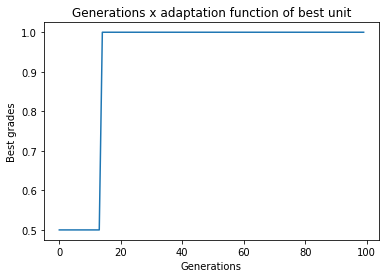

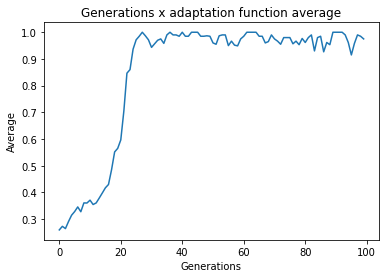

[1, 3, 0, 2]

1.0


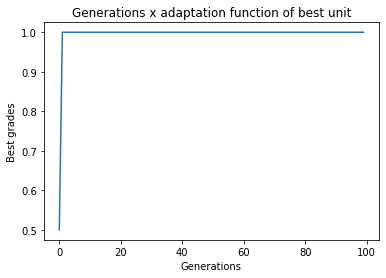

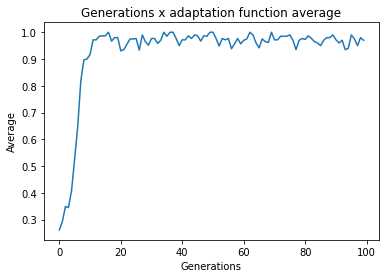

[1, 3, 0, 2]

1.0


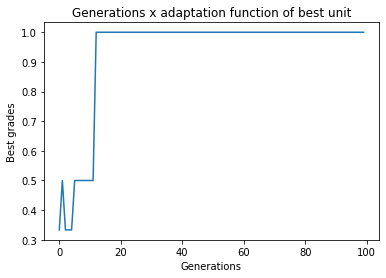

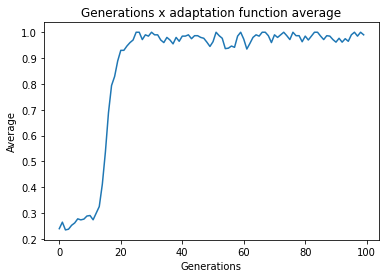

[2, 0, 3, 1]

1.0


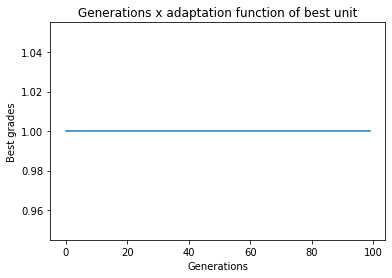

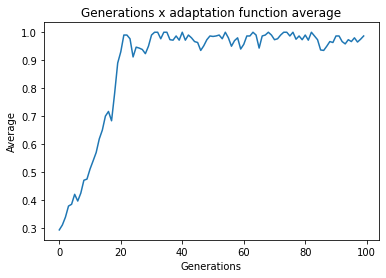

[2, 0, 3, 1]

1.0


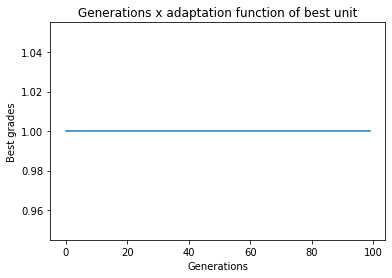

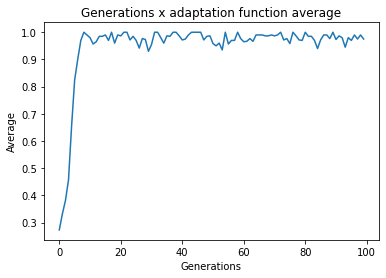

[1, 3, 0, 2]

1.0


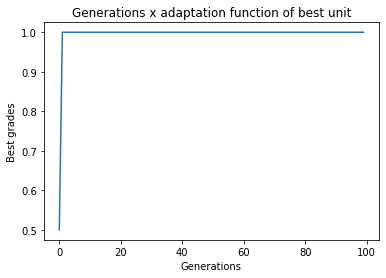

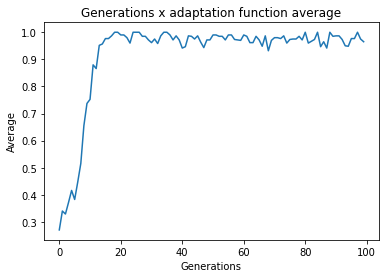

[0, 2, 3, 1]

0.5


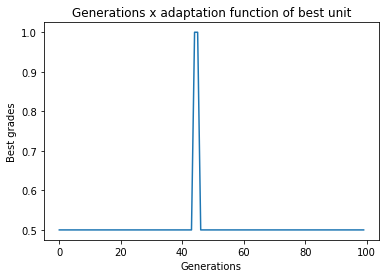

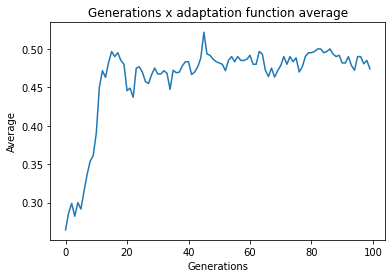

[1, 3, 0, 2]

1.0


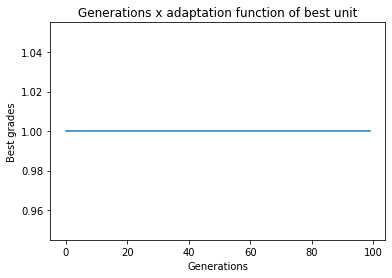

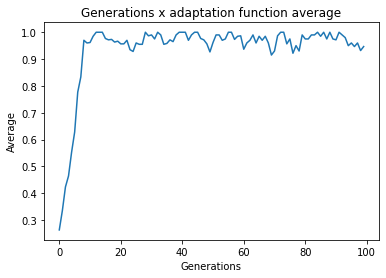

[1, 3, 0, 2]

1.0


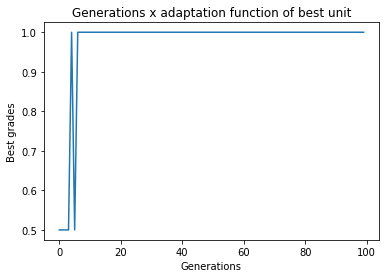

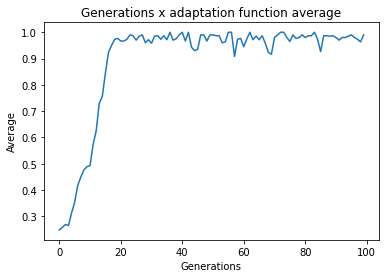

[1, 3, 0, 2]

1.0


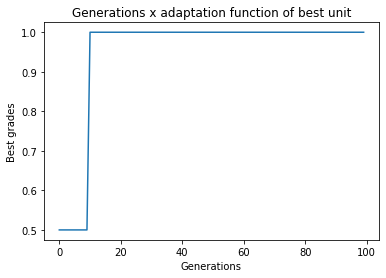

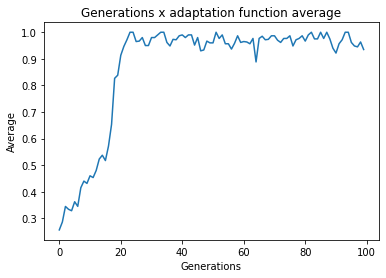


Soluções com elitismo
[2, 0, 3, 1]

1.0


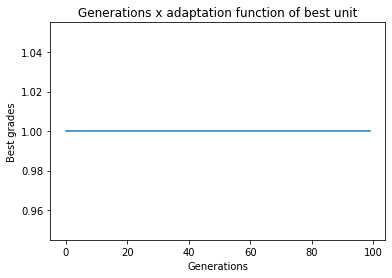

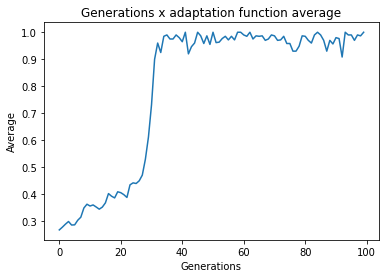

[2, 0, 3, 1]

1.0


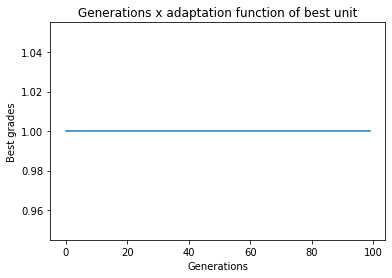

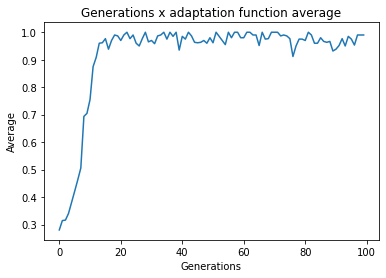

[2, 0, 3, 1]

1.0


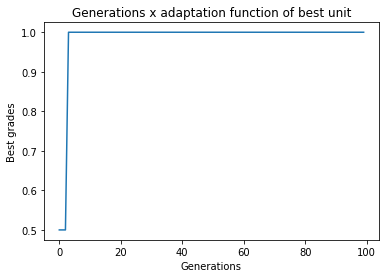

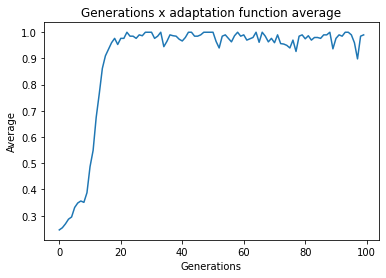

[1, 3, 0, 2]

1.0


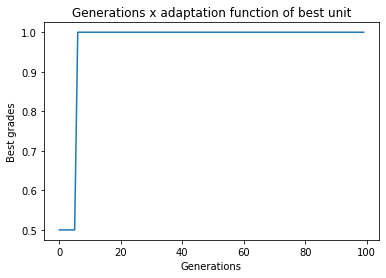

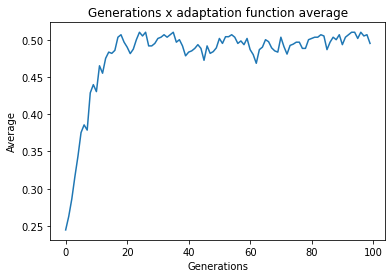

[2, 0, 3, 1]

1.0


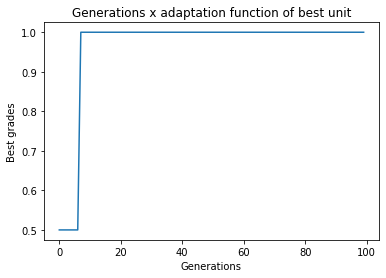

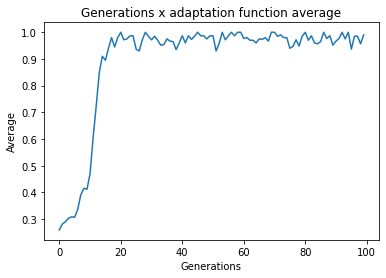

[2, 0, 3, 1]

1.0


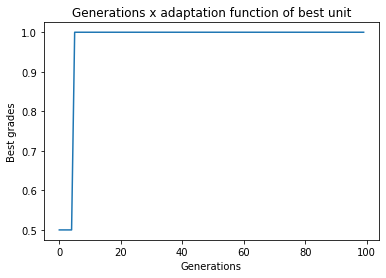

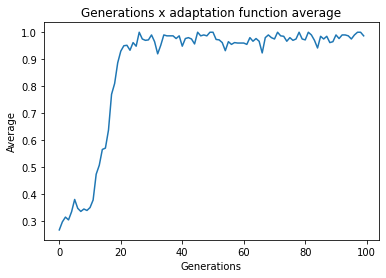

[1, 3, 0, 2]

1.0


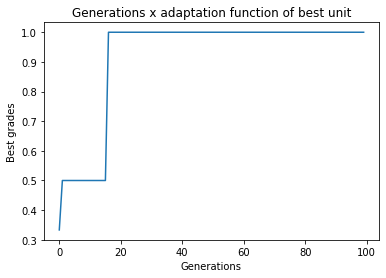

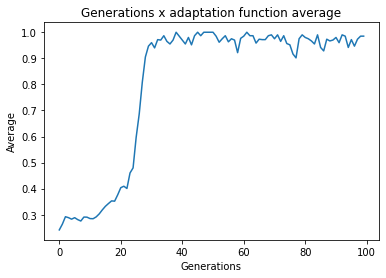

[1, 3, 0, 2]

1.0


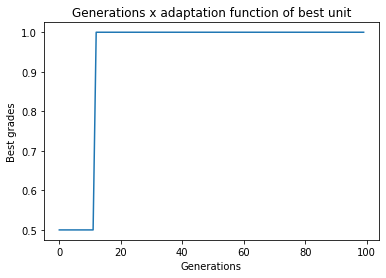

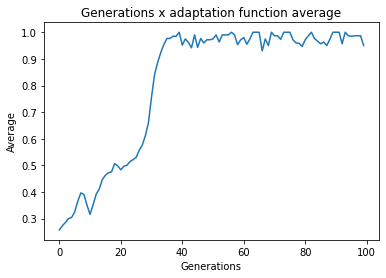

[2, 0, 3, 1]

1.0


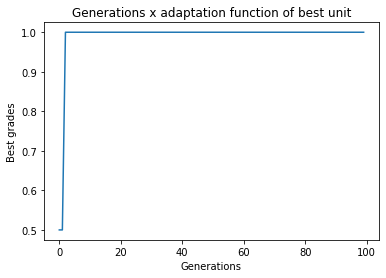

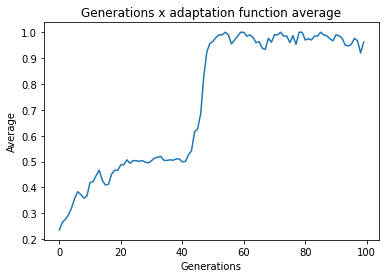

[2, 0, 3, 1]

1.0


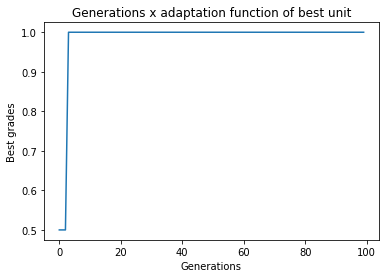

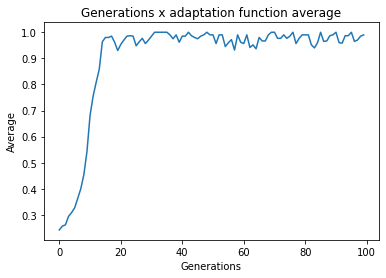

In [ ]:
from time import sleep

def main():


    global numDamas
    numDamas = 4

    print("Soluções sem elitismo: ")

    for i in range(10):       # Sem elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 100, 0.75, 0.03, False)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)

    print()
    print("Soluções com elitismo")

    for i in range(10):       # Com elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 100, 0.75, 0.03, True)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)


main()

No caso com elitismo, encontramos as soluções em todas as execuções.
Como no caso sem elitismo não há perpetuação do melhor indivíduo, a próxima geração pode piorar, como vimos no gŕafico de melhor indíviduo por geração.
Já no caso com elitismo, é impossível regredir no melhor indivíduo.

Primeira alteração será a quantidade de tabuleiros. Iremos diminuir para 10, já que são 10 casos.

Soluções sem elitismo: 
[2, 0, 3, 1]

1.0


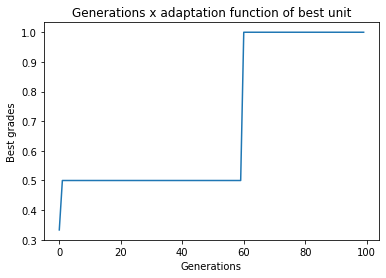

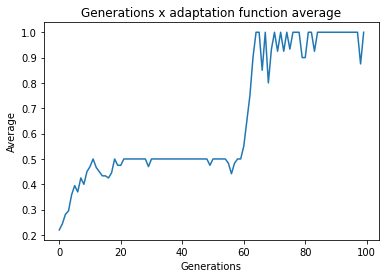

[1, 3, 0, 2]

1.0


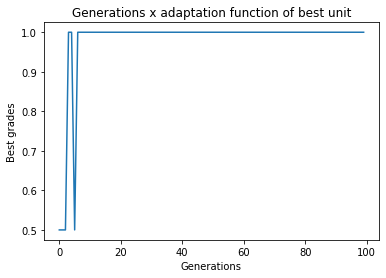

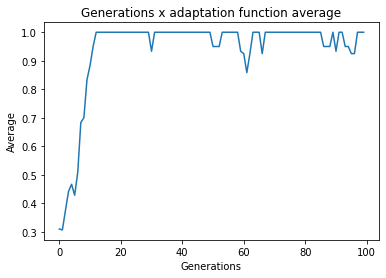

[0, 1, 3, 0]

0.3333333333333333


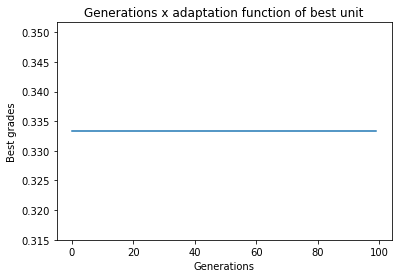

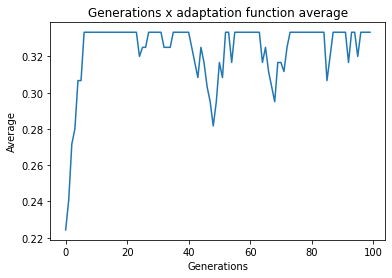

[1, 3, 2, 0]

0.5


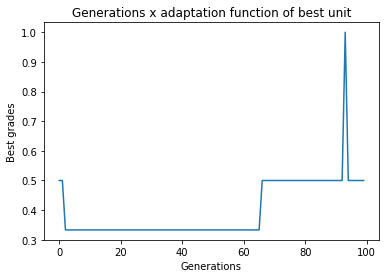

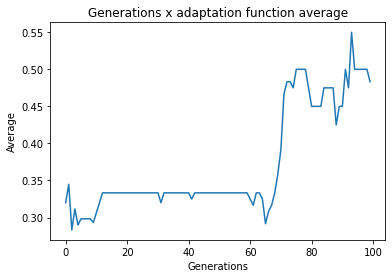

[0, 3, 1, 2]

0.5


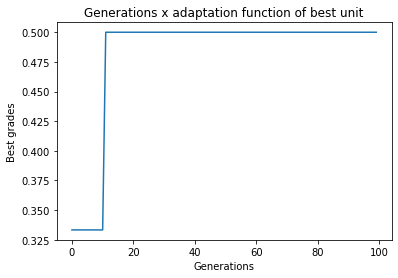

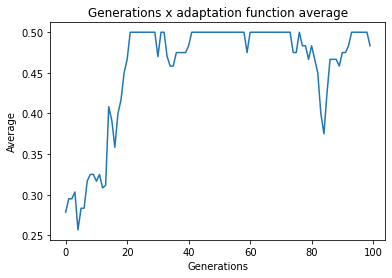

[3, 1, 2, 0]

0.3333333333333333


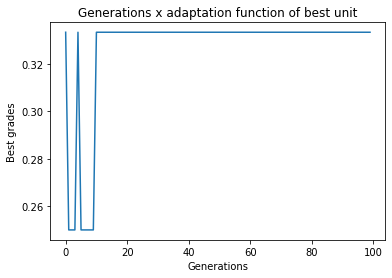

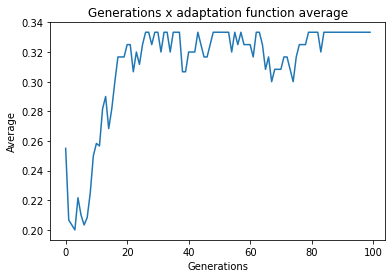

[0, 2, 3, 1]

0.5


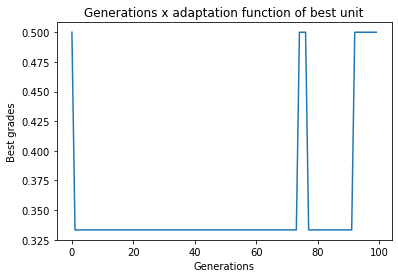

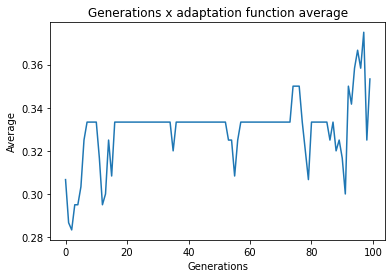

[1, 3, 2, 0]

0.5


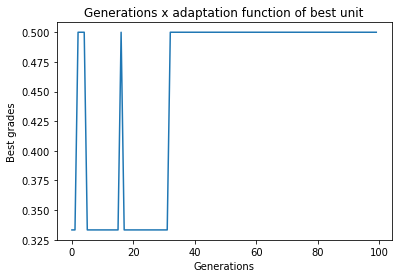

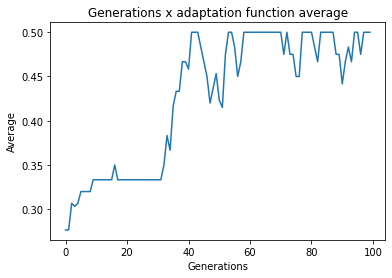

[2, 0, 3, 1]

1.0


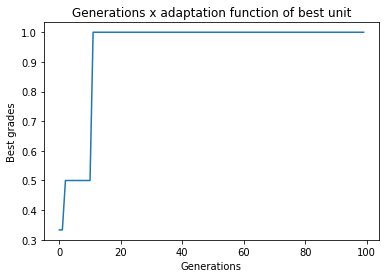

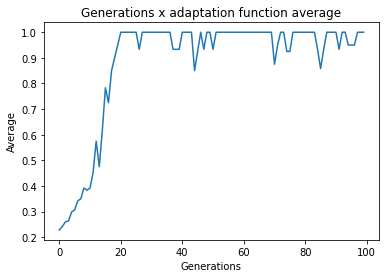

[2, 0, 3, 1]

1.0


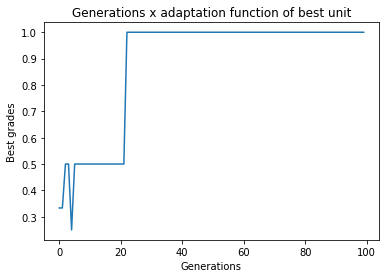

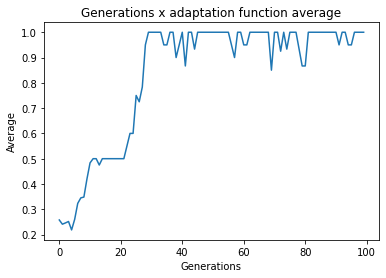


Soluções com elitismo
[0, 3, 0, 2]

0.5


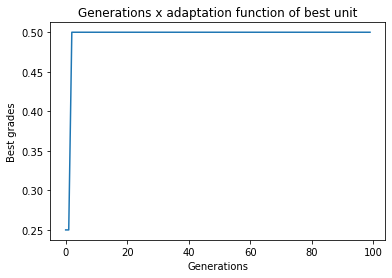

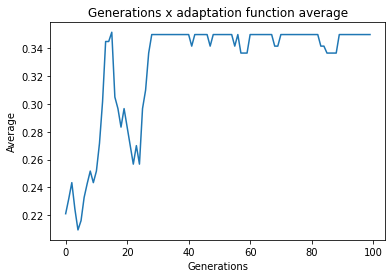

[1, 3, 0, 2]

1.0


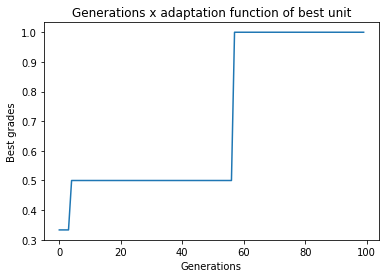

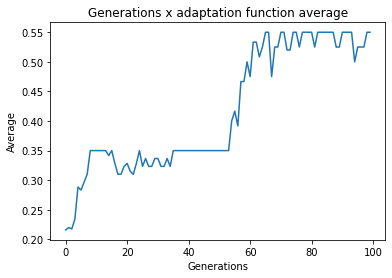

[2, 0, 3, 1]

1.0


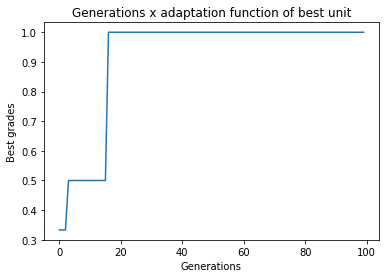

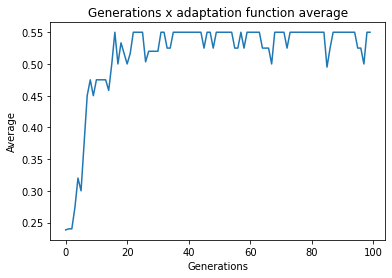

[3, 1, 0, 2]

0.5


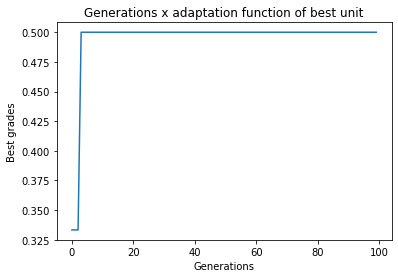

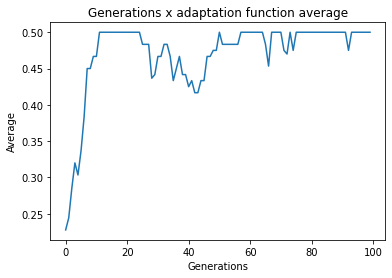

[1, 0, 2, 3]

0.3333333333333333


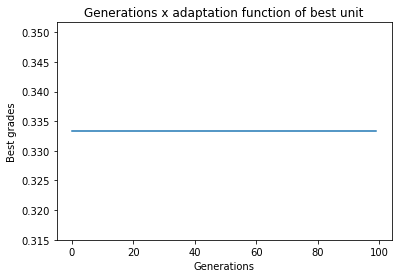

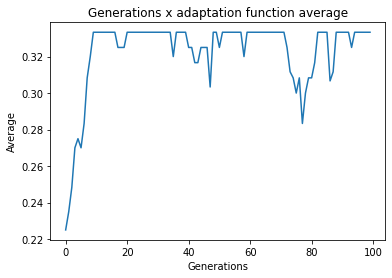

[1, 3, 0, 2]

1.0


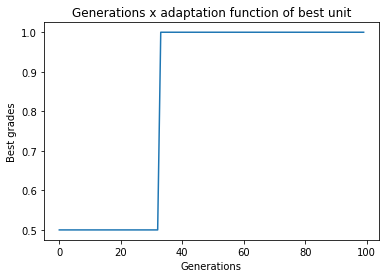

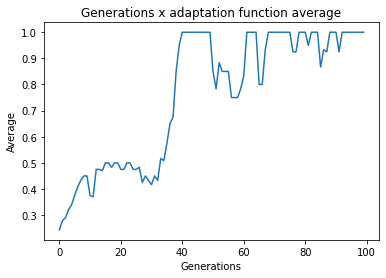

[2, 0, 3, 0]

0.5


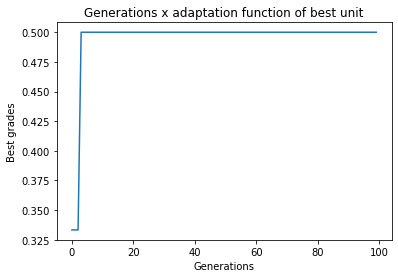

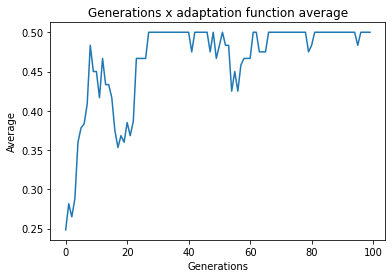

[1, 3, 2, 0]

0.5


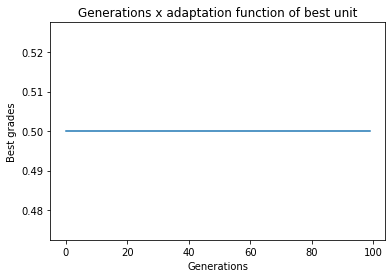

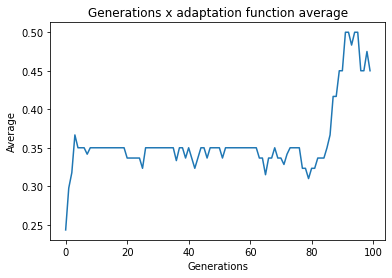

[3, 1, 0, 2]

0.5


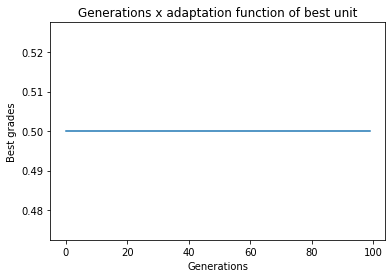

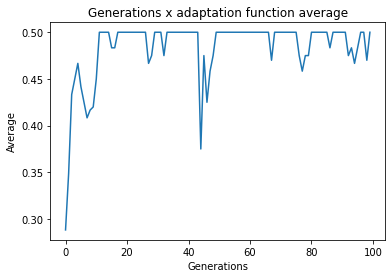

[2, 0, 3, 1]

1.0


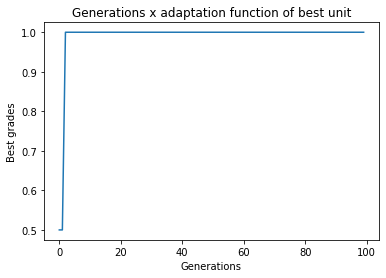

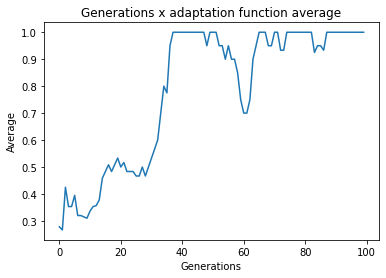

In [ ]:
def main():


    global numDamas
    numDamas = 4

    print("Soluções sem elitismo: ")

    for i in range(10):       # Sem elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 10, 100, 0.75, 0.03, False)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)

    print()
    print("Soluções com elitismo")

    for i in range(10):       # Com elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 10, 100, 0.75, 0.03, True)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)


main()

Nesse caso,  tivemos execuções em que não foram obtidas soluções e um máximo local foi atingido. Como a população é bem menor, a chance de sair do máximo local é reduzida. Além disso, a variabilidade genética diminui por serem menos indivíduos. Mesmo com o uso do elitismo, houve casos em que não obtivemos um tabuleiro sem ataques. Podemos observar que o gráfico de média sofreu muitas variações, até nos casos com elitismo. Como a população é pequena, muitos indivíduos eram diferentes entre si, o que influenciava o resultado.

A segunda alteração será diminuir o número de gerações para 50, teoricamente para haver chance de alterar cada tabuleiro da população inicial.

Soluções sem elitismo: 
[2, 0, 3, 1]

1.0


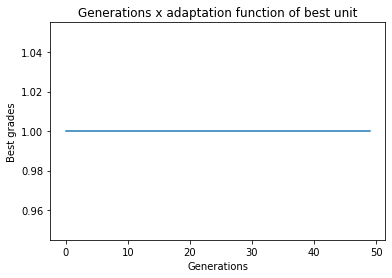

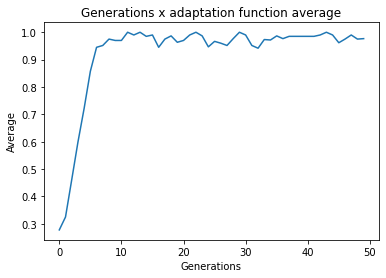

[1, 3, 0, 2]

1.0


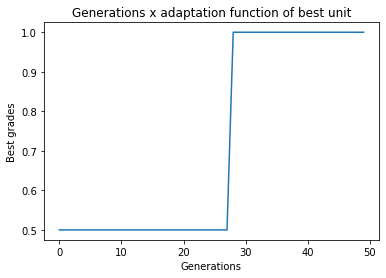

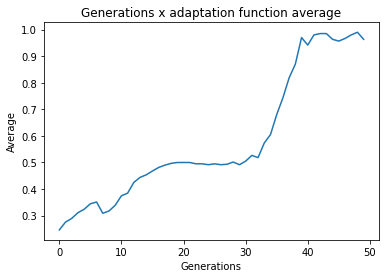

[2, 0, 3, 1]

1.0


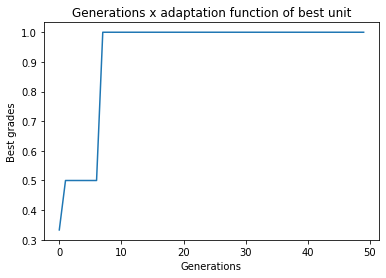

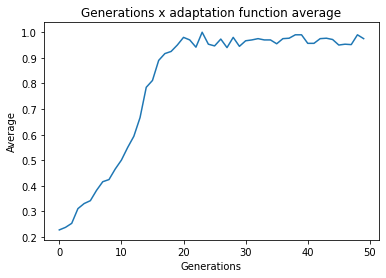

[2, 0, 3, 1]

1.0


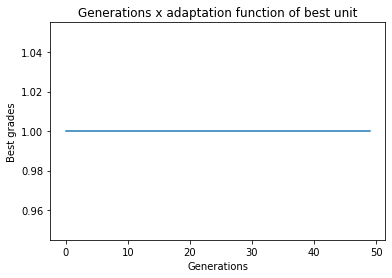

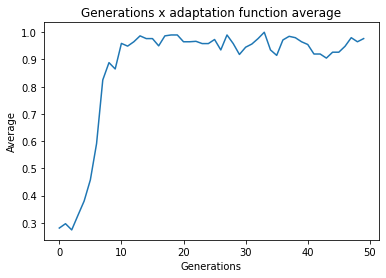

[2, 0, 3, 1]

1.0


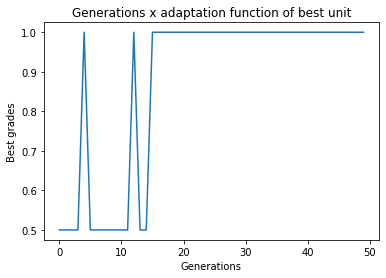

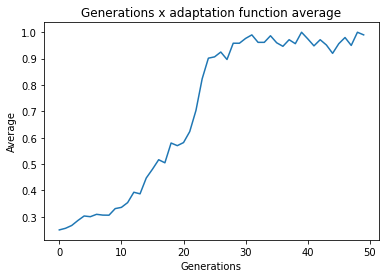

[1, 3, 0, 2]

1.0


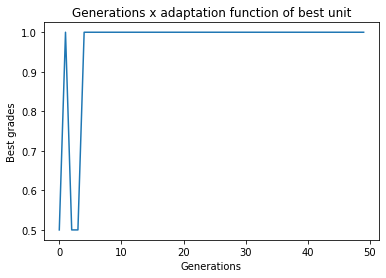

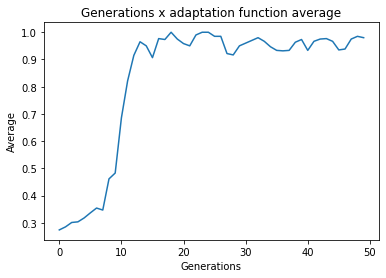

[2, 0, 3, 1]

1.0


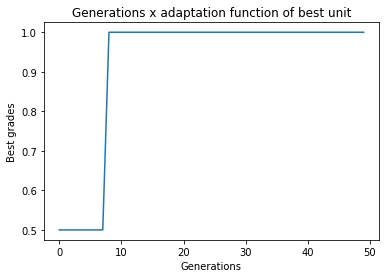

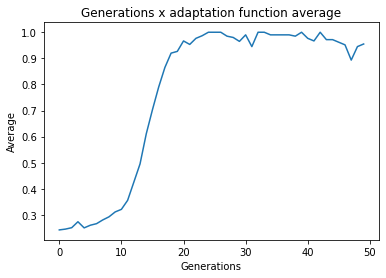

[2, 0, 3, 1]

1.0


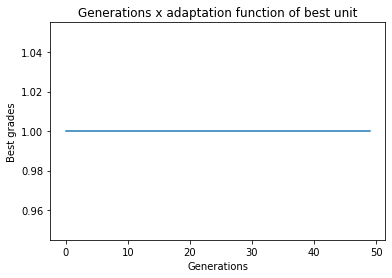

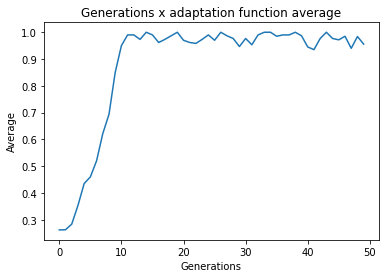

[2, 0, 3, 1]

1.0


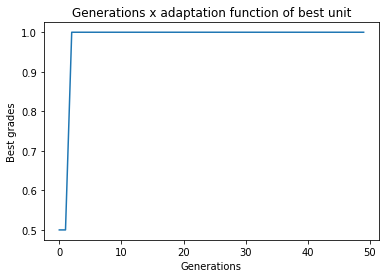

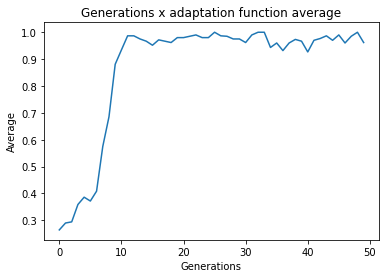

[1, 3, 0, 2]

1.0


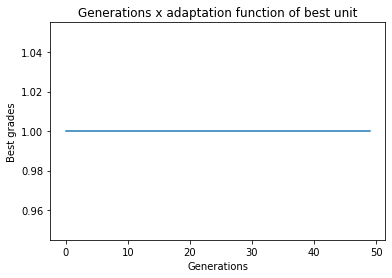

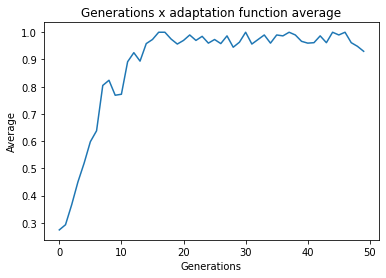


Soluções com elitismo
[2, 0, 3, 1]

1.0


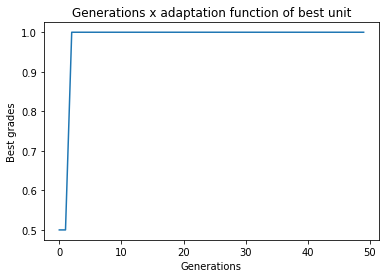

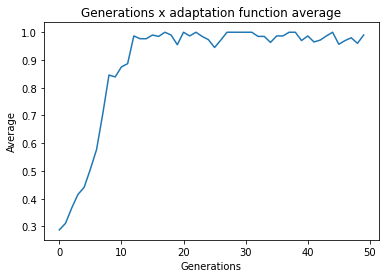

[2, 0, 3, 1]

1.0


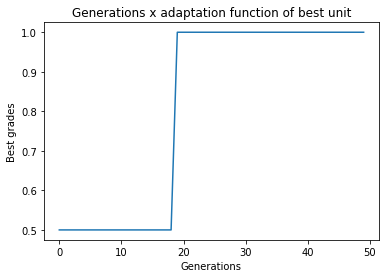

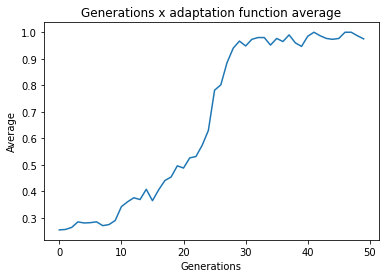

[2, 0, 3, 1]

1.0


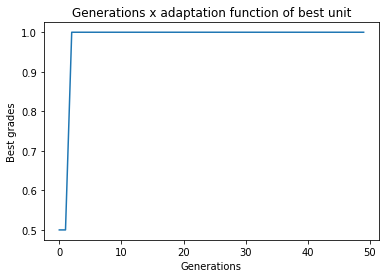

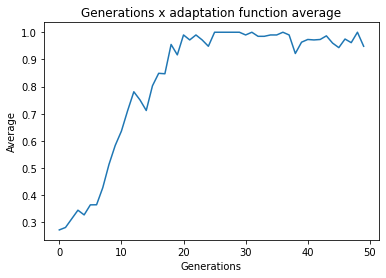

[1, 3, 0, 2]

1.0


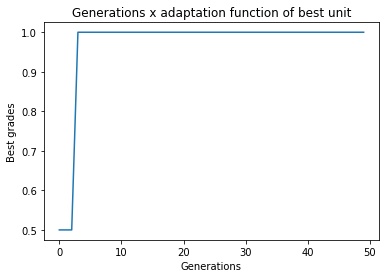

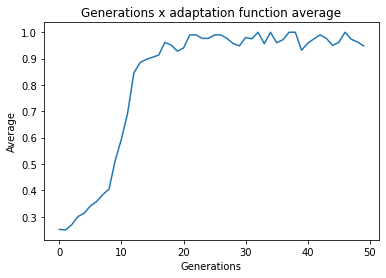

[2, 0, 3, 1]

1.0


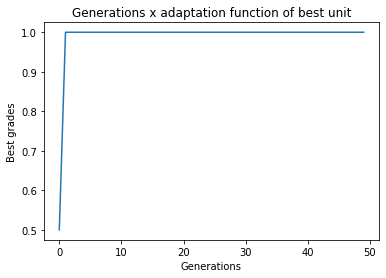

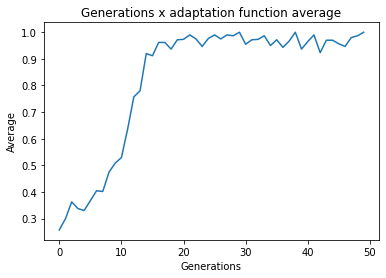

[1, 3, 0, 2]

1.0


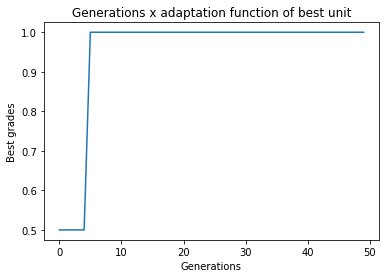

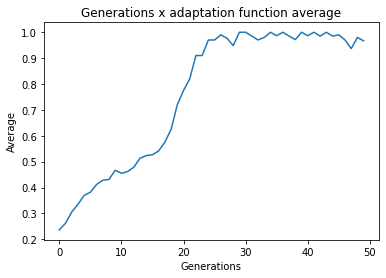

[1, 3, 0, 2]

1.0


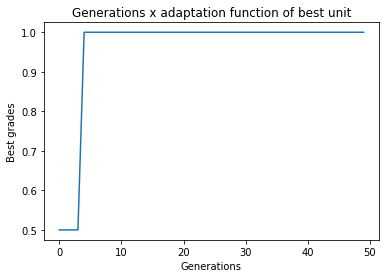

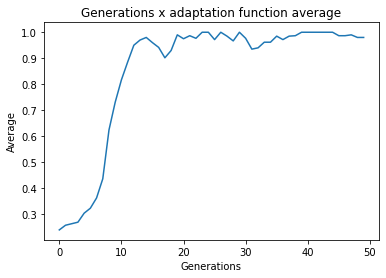

[1, 3, 0, 2]

1.0


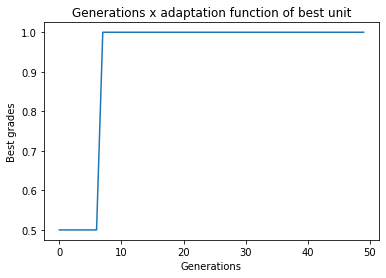

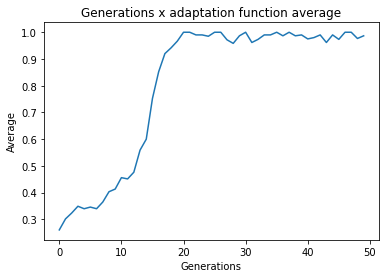

[1, 3, 0, 2]

1.0


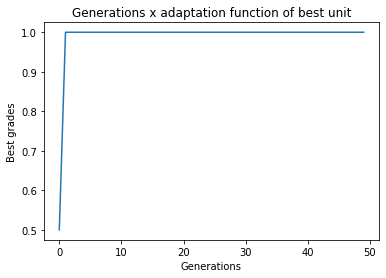

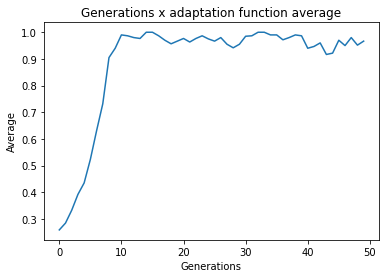

[2, 0, 3, 1]

1.0


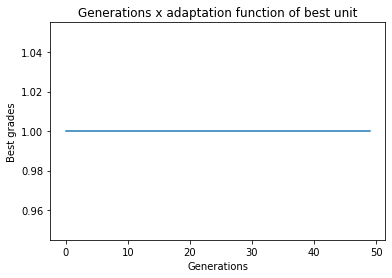

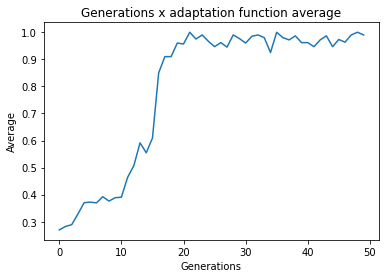

In [ ]:
def main():


    global numDamas
    numDamas = 4

    print("Soluções sem elitismo: ")

    for i in range(10):       # Sem elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 50, 0.75, 0.03, False)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)

    print()
    print("Soluções com elitismo")

    for i in range(10):       # Com elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 50, 0.75, 0.03, True)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)


main()

Obtivemos a solução em todos os casos. Como o número de gerações diminuiu e ficou muito próximo do tamanho da população, o gráfico de média ficou bastante alterado em cada execução, devido à aleatoriedade do algoritmo em relação à variabilidade genética. A estabilização da população demorou.

Alterando a probabilidade de crossover para 70%, para reduzir a variabilidade genética ao máximo.

Soluções sem elitismo: 
[2, 0, 3, 1]

1.0


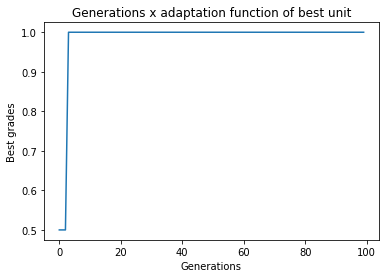

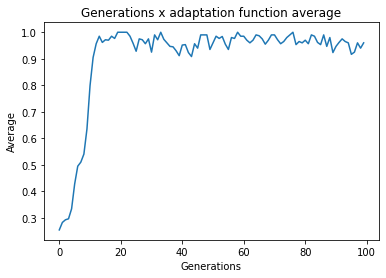

[1, 3, 0, 2]

1.0


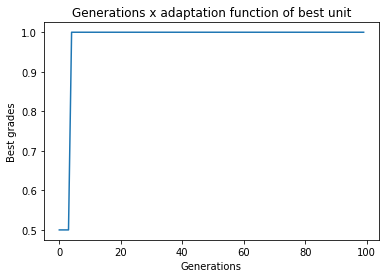

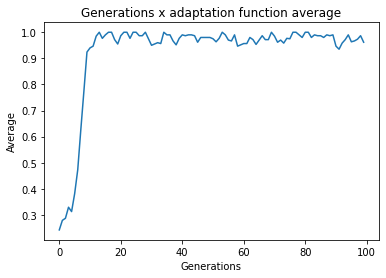

[1, 3, 0, 2]

1.0


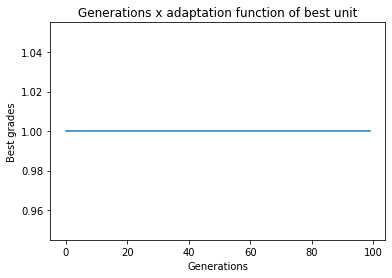

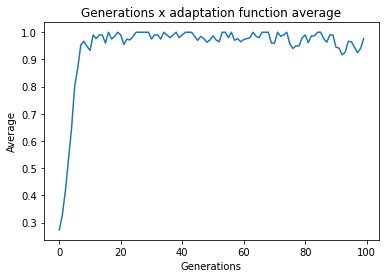

[2, 0, 3, 1]

1.0


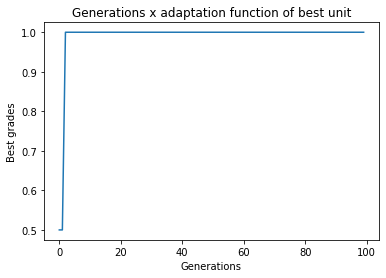

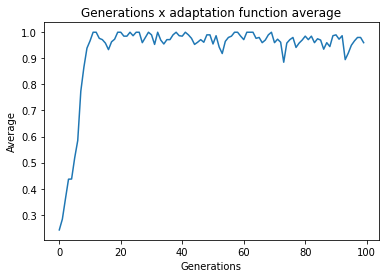

[2, 0, 3, 1]

1.0


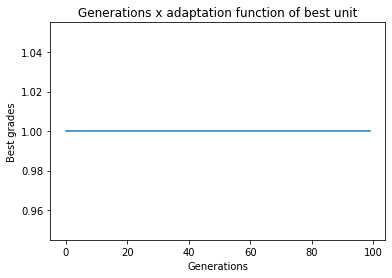

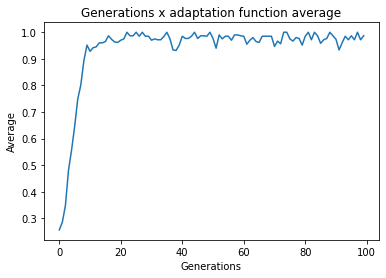

[1, 3, 0, 2]

1.0


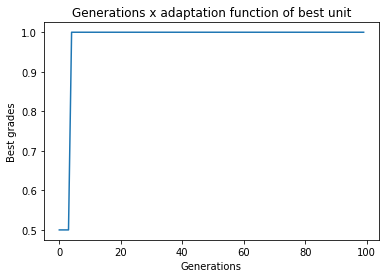

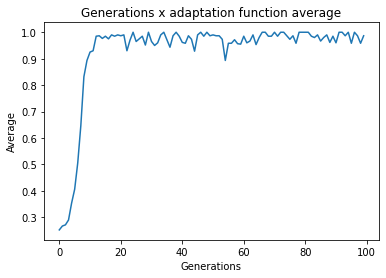

[1, 3, 0, 2]

1.0


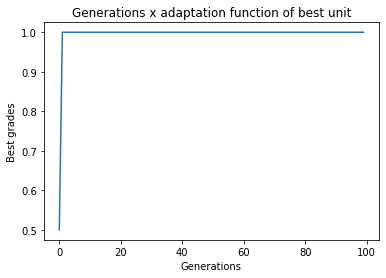

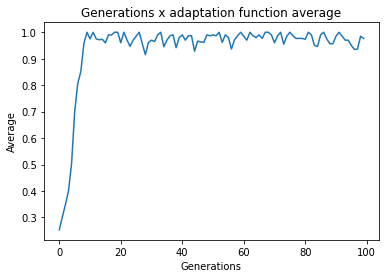

[2, 0, 3, 1]

1.0


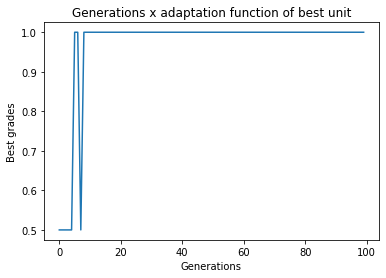

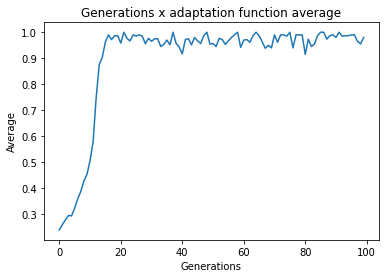

[2, 0, 3, 1]

1.0


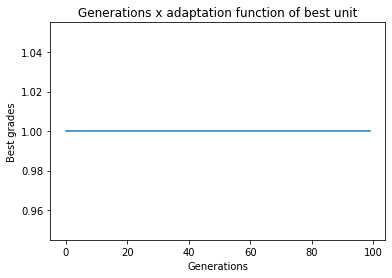

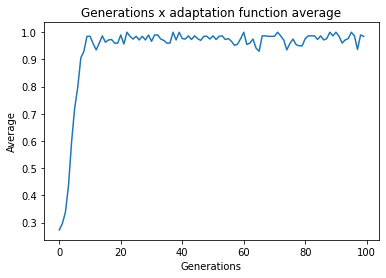

[1, 3, 0, 2]

1.0


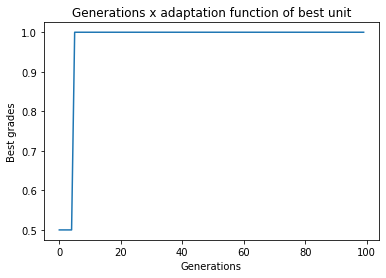

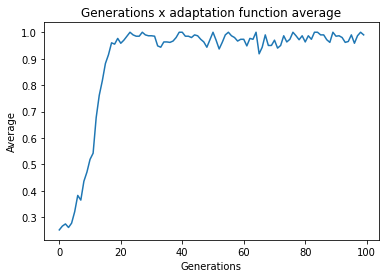


Soluções com elitismo
[1, 3, 0, 2]

1.0


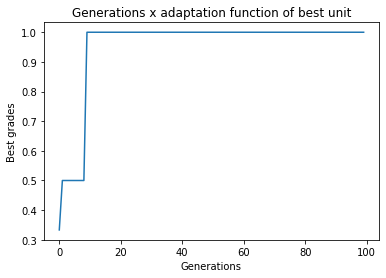

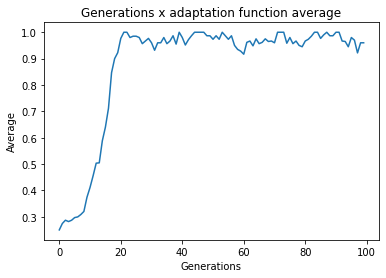

[2, 0, 3, 1]

1.0


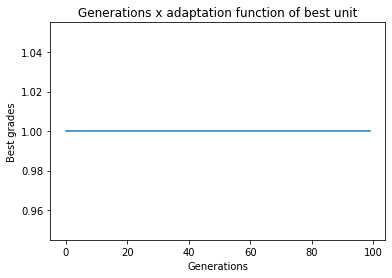

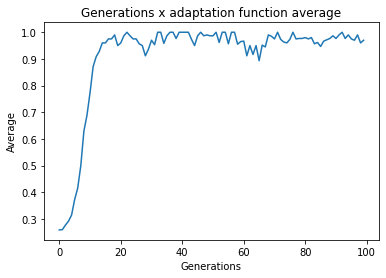

[2, 0, 3, 1]

1.0


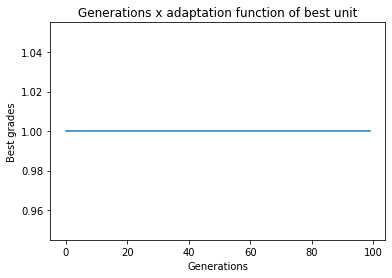

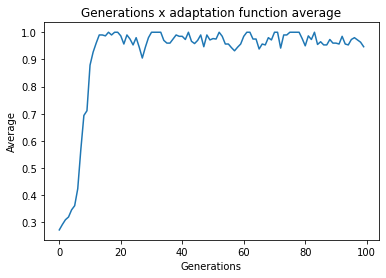

[2, 0, 3, 1]

1.0


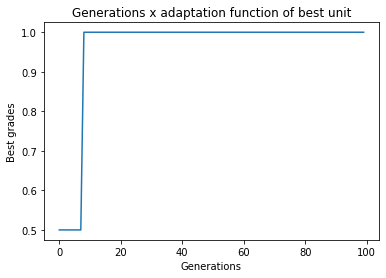

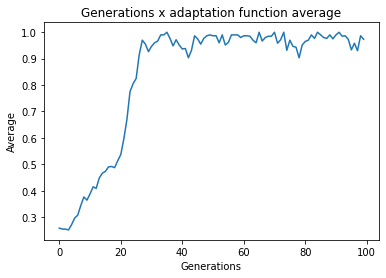

[2, 0, 3, 1]

1.0


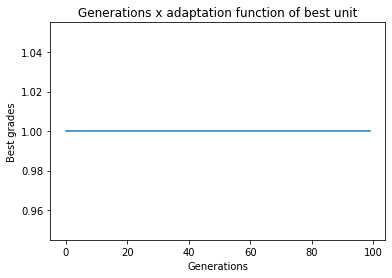

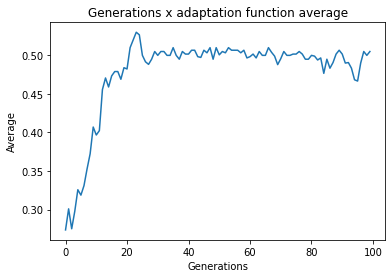

[1, 3, 0, 2]

1.0


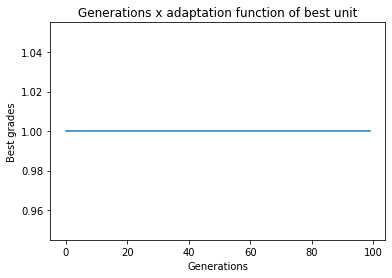

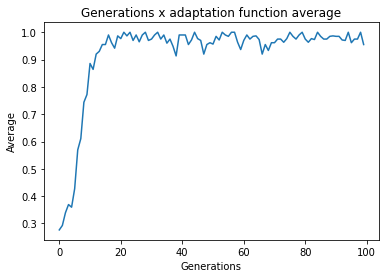

[2, 0, 3, 1]

1.0


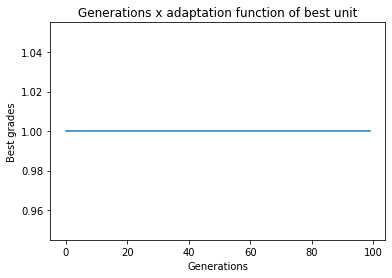

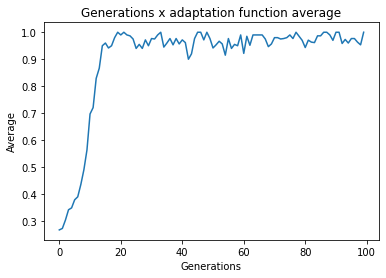

[1, 3, 0, 2]

1.0


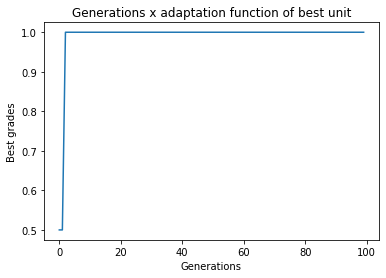

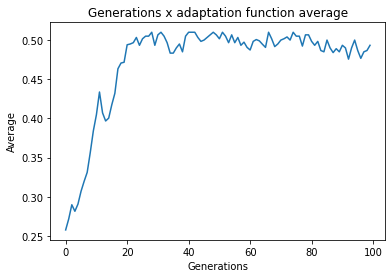

[2, 0, 3, 1]

1.0


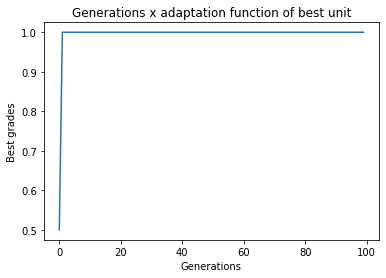

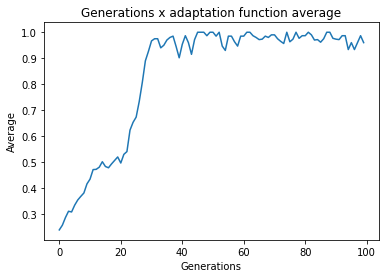

[1, 3, 0, 2]

1.0


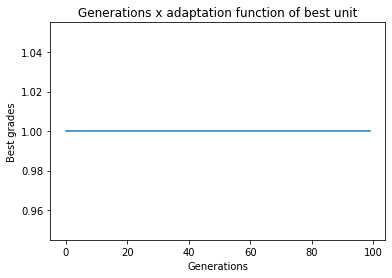

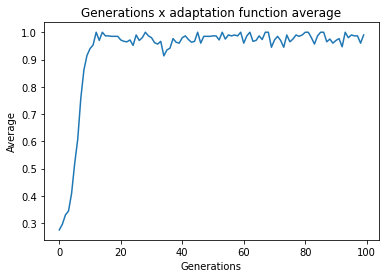

In [ ]:
def main():


    global numDamas
    numDamas = 4

    print("Soluções sem elitismo: ")

    for i in range(10):       # Sem elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 100, 0.7, 0.03, False)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)

    print()
    print("Soluções com elitismo")

    for i in range(10):       # Com elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 100, 0.7, 0.03, True)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)


main()

O equilíbrio populacional, de acordo com o gráfico de média, foi obtido na 30ª geração aproximadamente. Novamente, como há muitos tabuleiros e gerações para poucas combinações de posições, encontramos a solução em todos os casos.

A última alteração será a probabilidade de crossover para 5%. Iremos tentar modificar a população ao máximo.

Soluções sem elitismo: 
[1, 3, 0, 2]

1.0


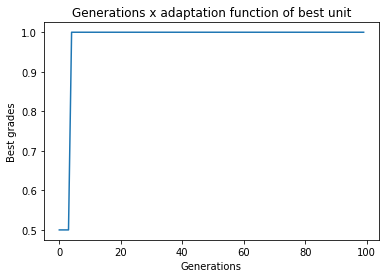

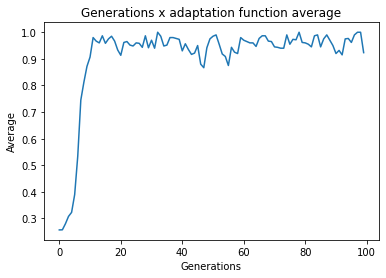

[2, 0, 3, 1]

1.0


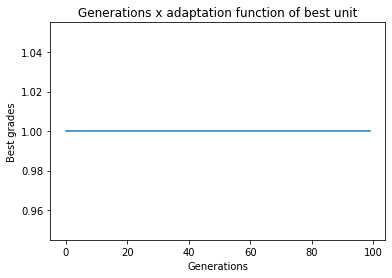

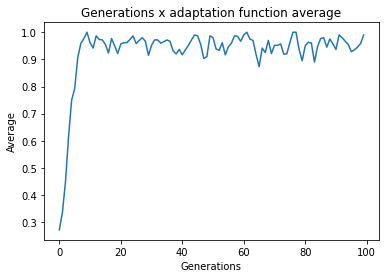

[2, 0, 3, 1]

1.0


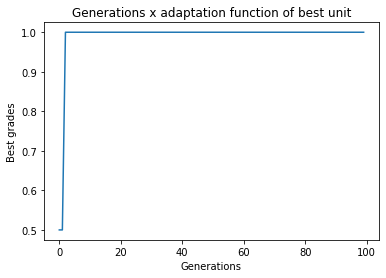

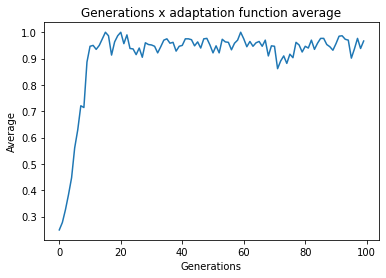

[1, 3, 0, 2]

1.0


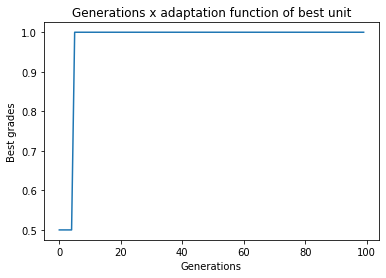

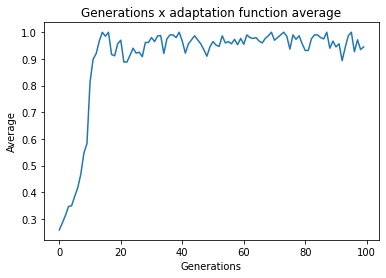

[2, 0, 3, 1]

1.0


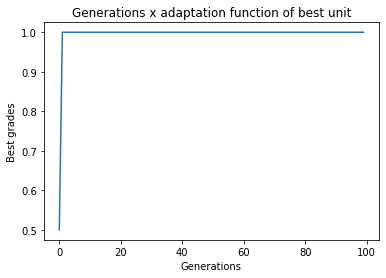

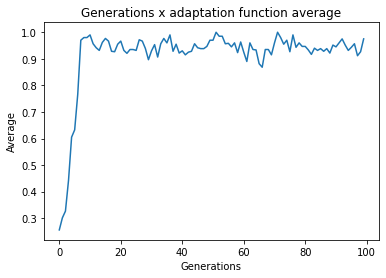

[2, 0, 3, 1]

1.0


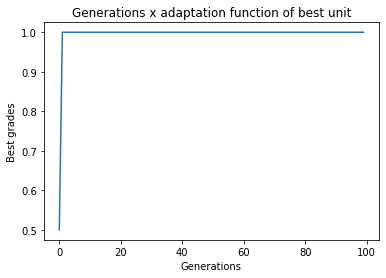

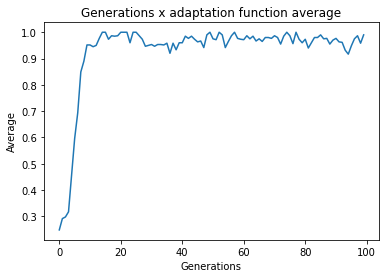

[2, 0, 3, 1]

1.0


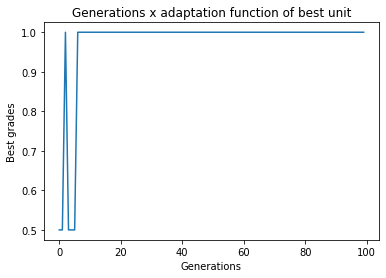

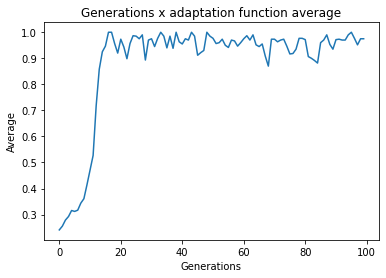

[2, 0, 3, 1]

1.0


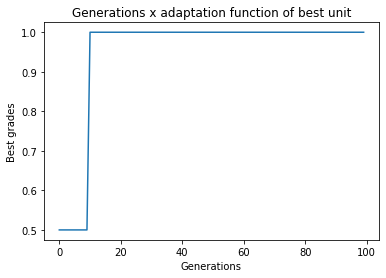

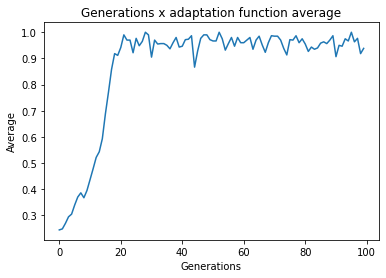

[2, 0, 3, 1]

1.0


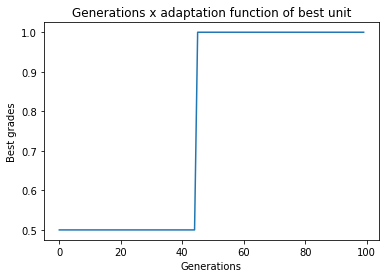

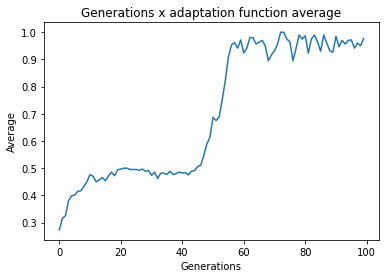

[1, 3, 0, 2]

1.0


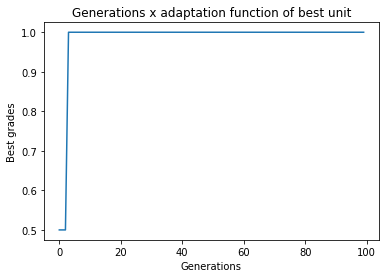

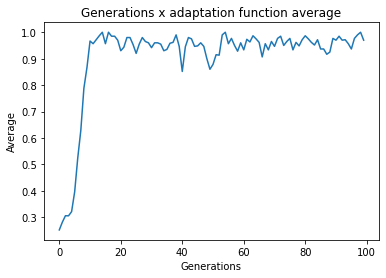


Soluções com elitismo
[2, 0, 3, 1]

1.0


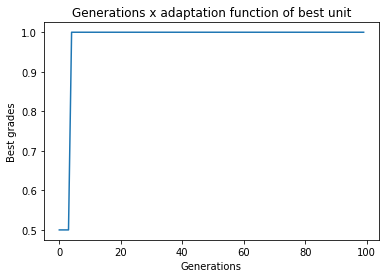

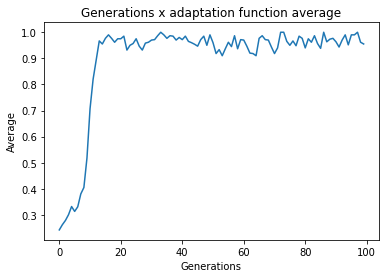

[1, 3, 0, 2]

1.0


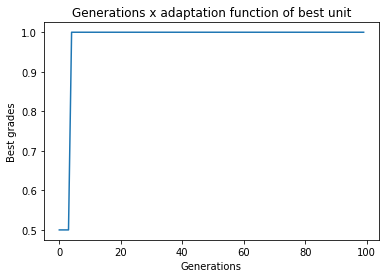

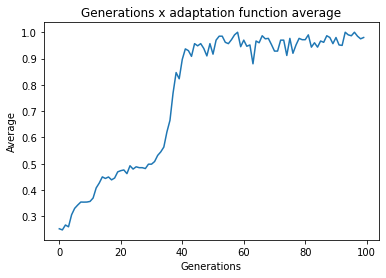

[1, 3, 0, 2]

1.0


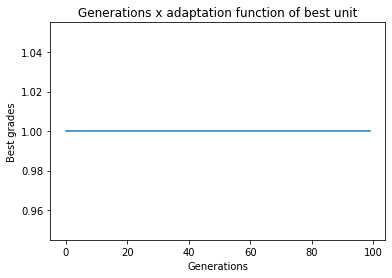

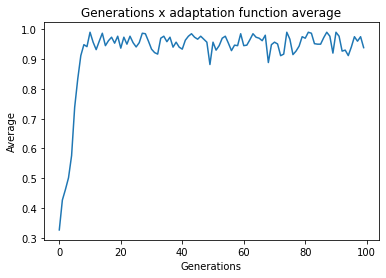

[1, 3, 0, 2]

1.0


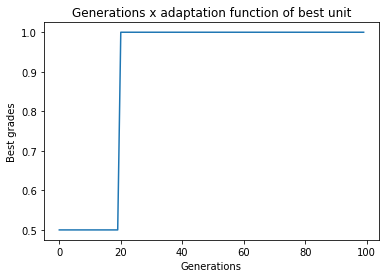

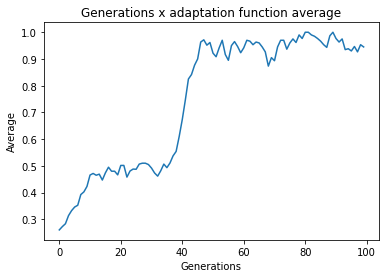

[2, 0, 3, 1]

1.0


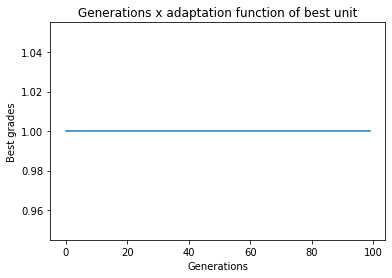

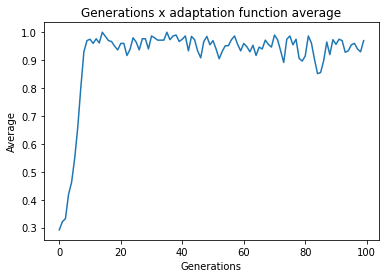

[2, 0, 3, 1]

1.0


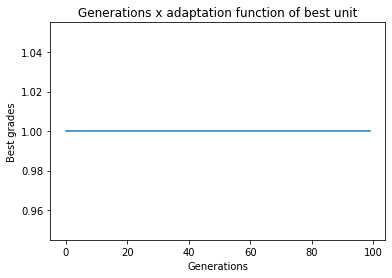

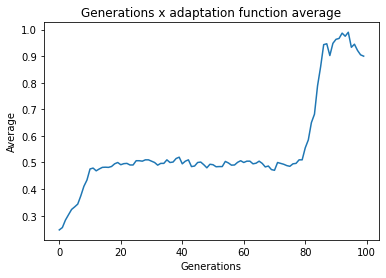

[2, 0, 3, 1]

1.0


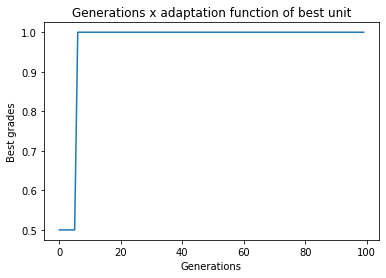

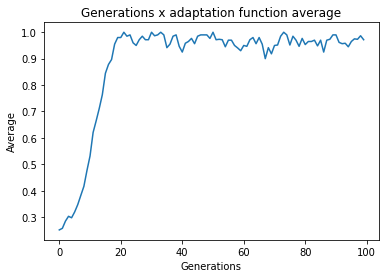

[1, 3, 0, 2]

1.0


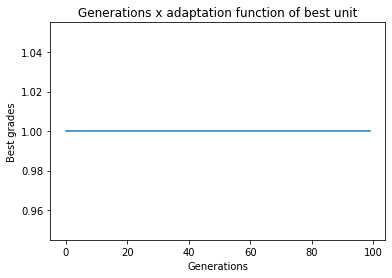

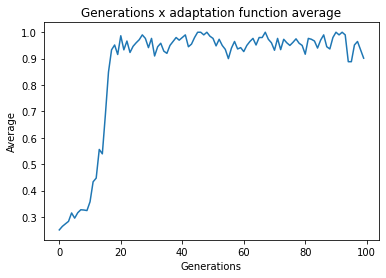

[2, 0, 3, 1]

1.0


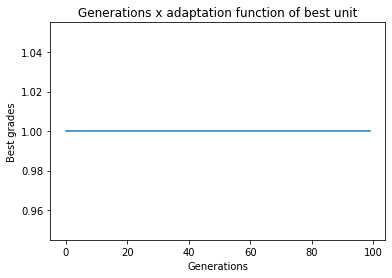

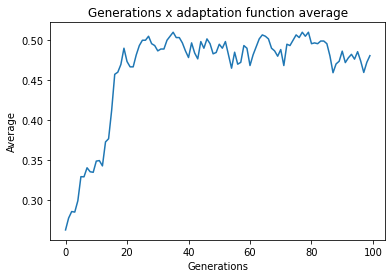

[2, 0, 3, 1]

1.0


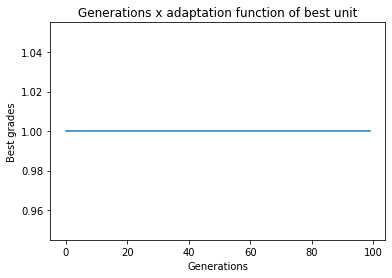

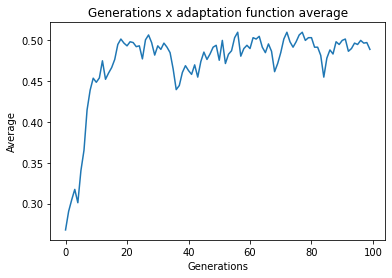

In [ ]:
def main():


    global numDamas
    numDamas = 4

    print("Soluções sem elitismo: ")

    for i in range(10):       # Sem elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 100, 0.75, 0.05, False)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)

    print()
    print("Soluções com elitismo")

    for i in range(10):       # Com elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(4, 50, 100, 0.75, 0.05, True)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)


main()

Tivemos dois casos interessantes. Um dos gráficos teve um grande salto de média de uma geração para outra e uma leve queda logo após. Houve um caso em que a solução foi obtida apenas ao se aproximar da metade de gerações. O melhor indivíduo possuía um ataque no tabuleiro. A mutação, provavelmente, permitiu que um tabuleiro fosse gerado sem ataques, fornecendo a solução.

# Algoritmo genético - Item F)

## 8 damas

Soluções sem elitismo: 
[4, 2, 5, 3, 1, 7, 2, 6]

0.5


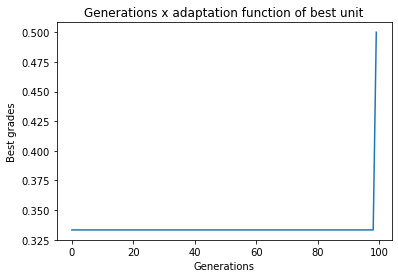

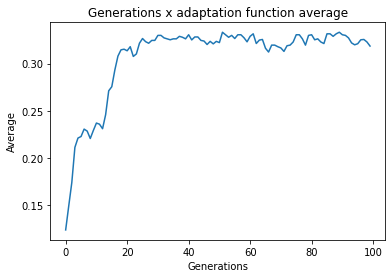

[0, 3, 7, 2, 6, 1, 7, 5]

0.3333333333333333


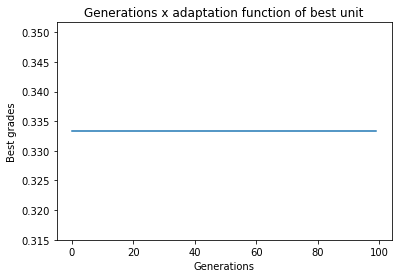

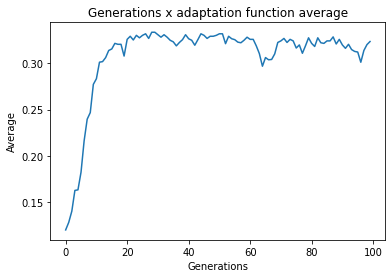

[4, 2, 0, 5, 7, 1, 6, 3]

0.5


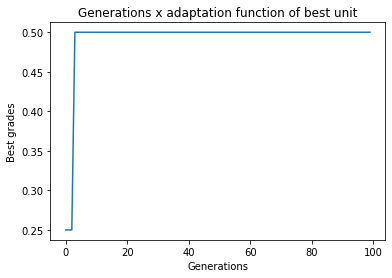

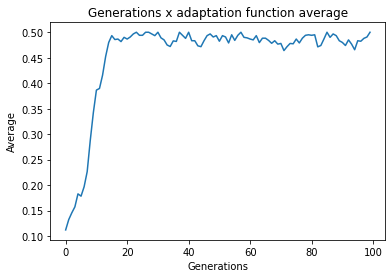

[4, 2, 0, 5, 7, 1, 3, 6]

1.0


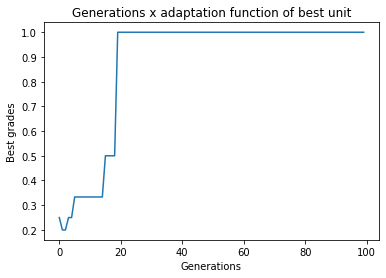

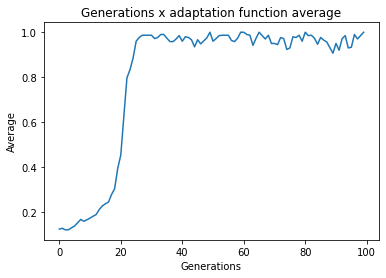

[4, 2, 7, 3, 6, 0, 5, 1]

1.0


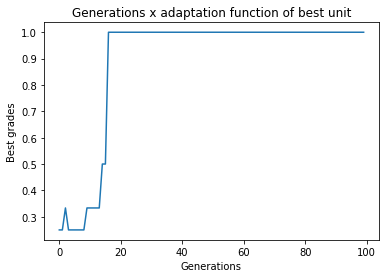

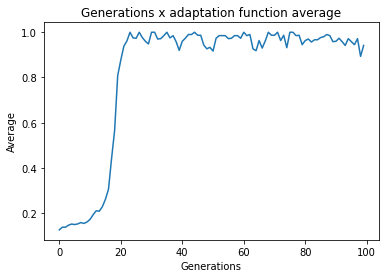

[4, 7, 1, 6, 2, 0, 5, 3]

0.5


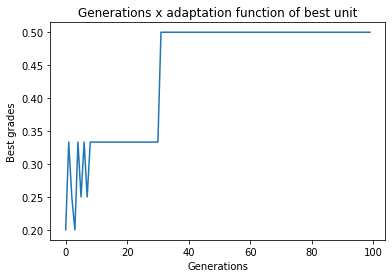

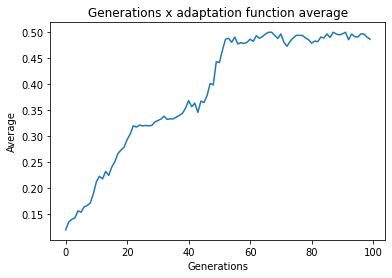

[2, 5, 1, 1, 4, 0, 7, 3]

0.5


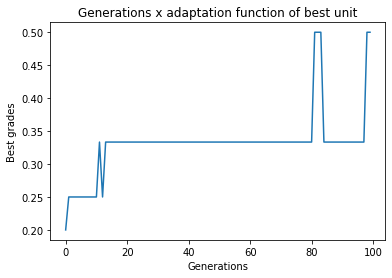

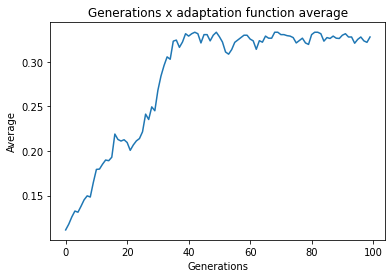

[5, 3, 1, 4, 2, 6, 3, 7]

0.3333333333333333


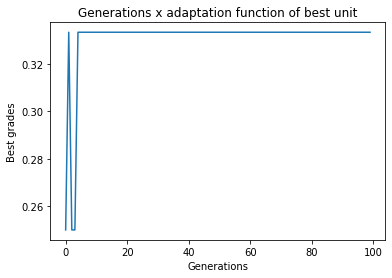

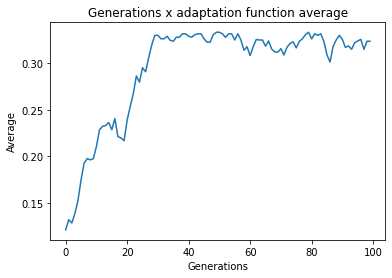

[4, 0, 5, 5, 2, 6, 3, 7]

0.5


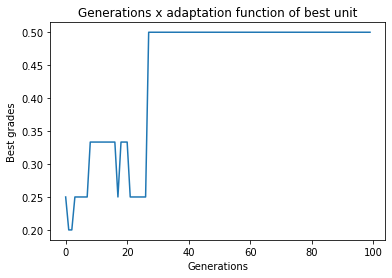

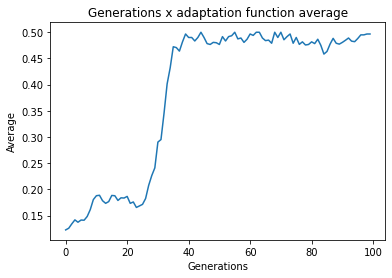

[2, 0, 7, 4, 7, 0, 6, 3]

0.3333333333333333


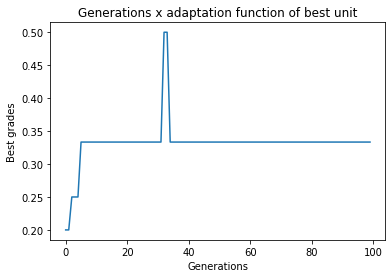

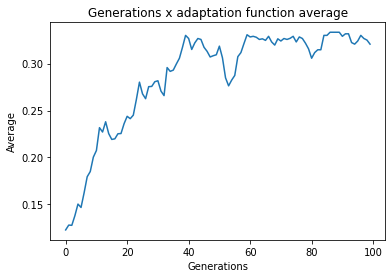


Soluções com elitismo
[1, 4, 7, 3, 6, 0, 2, 5]

0.5


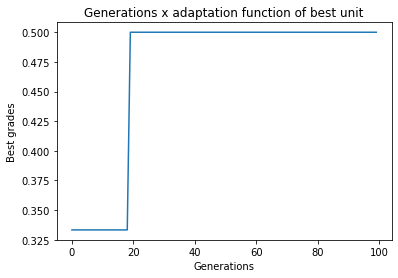

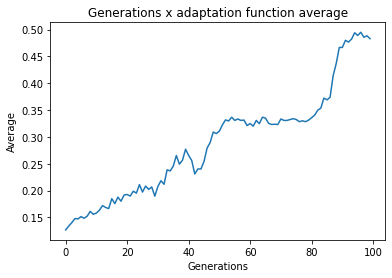

[5, 3, 0, 6, 4, 1, 7, 4]

0.5


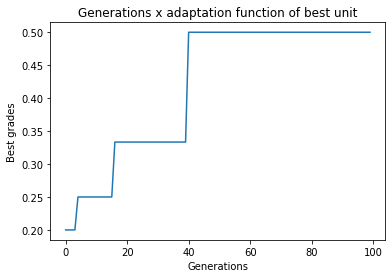

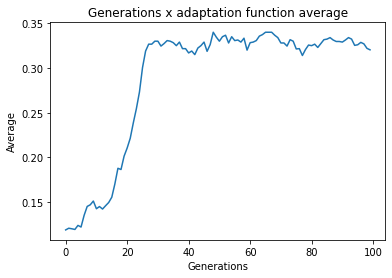

[2, 7, 1, 7, 0, 6, 0, 5]

0.3333333333333333


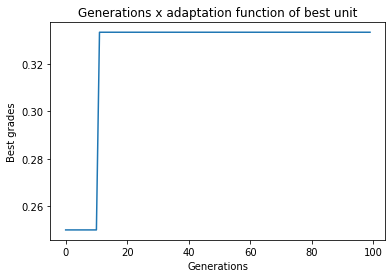

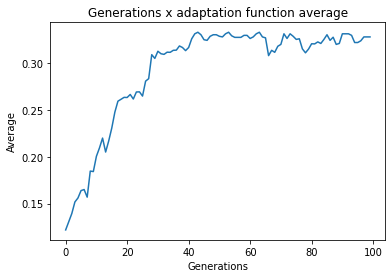

[3, 0, 7, 7, 4, 6, 1, 5]

0.5


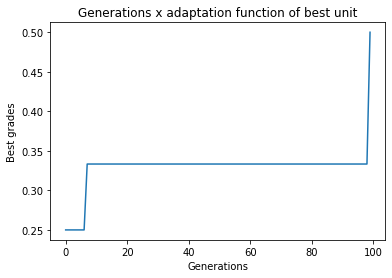

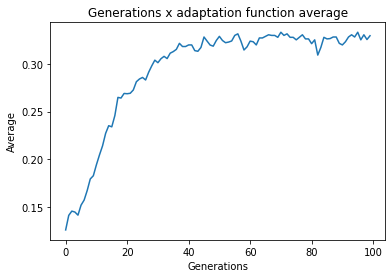

[3, 7, 0, 2, 5, 1, 6, 4]

1.0


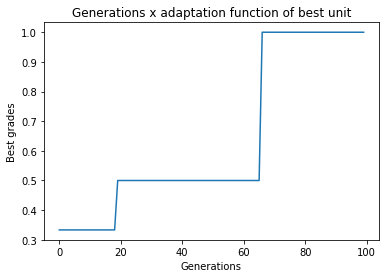

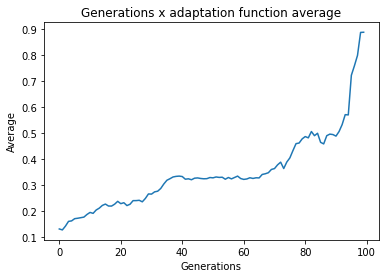

[5, 7, 1, 3, 0, 6, 4, 2]

1.0


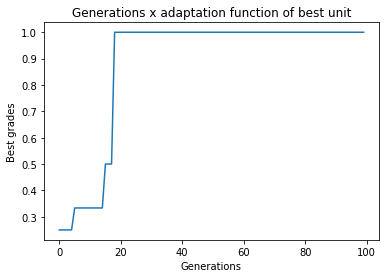

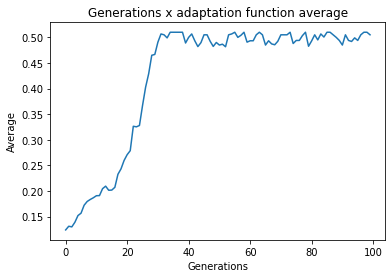

[5, 2, 1, 4, 6, 3, 0, 7]

0.3333333333333333


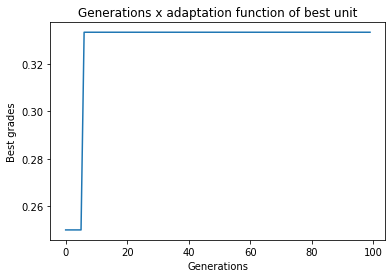

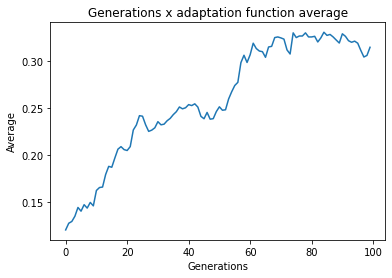

[2, 5, 1, 6, 4, 0, 7, 3]

1.0


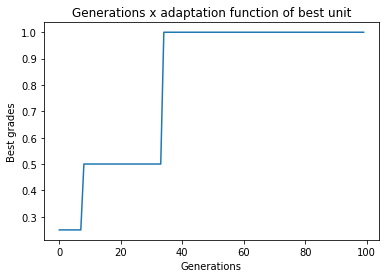

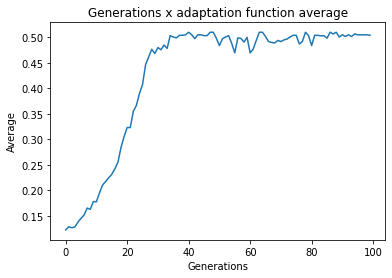

[1, 5, 2, 0, 7, 4, 6, 3]

0.5


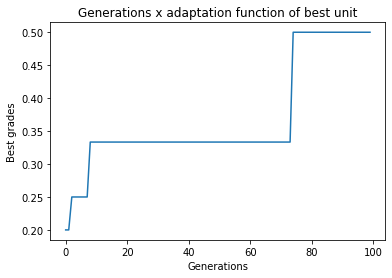

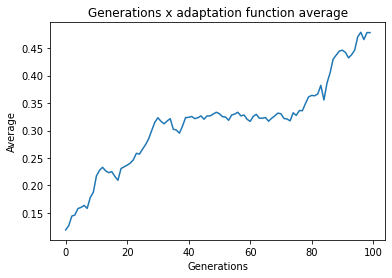

[1, 4, 6, 3, 0, 2, 5, 7]

0.5


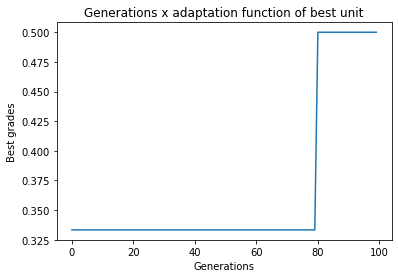

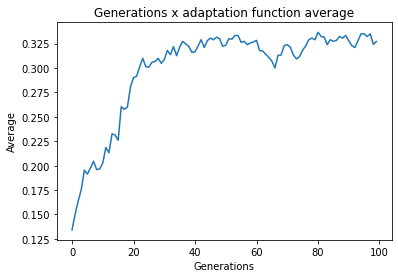

In [ ]:
def main():


    global numDamas
    numDamas = 8

    print("Soluções sem elitismo: ")

    for i in range(10):       # Sem elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(8, 50, 100, 0.75, 0.03, False)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)

    print()
    print("Soluções com elitismo")

    for i in range(10):       # Sem elitismo
      melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(8, 50, 100, 0.75, 0.03, True)

      print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
      x= list(range(0,len(melhoresIndividuos)))
      y= melhoresNotas
      bestUnitPlot(x,y)
      x= list(range(0,len(mediasIndividuos)))
      y= mediasIndividuos
      bestUnitMeanPlot(x, y)


main()

Podemos ver que, ao aumentar drasticamente o número de combinações de tabuleiros, encontramos com dificuldade a solução.

Uma delas foi através do elitismo:

[2, 5, 1, 6, 4, 0, 7, 3]

|Índice      | 2   | 5   | 1   | 6   | 4   | 0   | 7   | 3 |
|------|-----|-----|-----|-----|-----|-----|-----|-----|
| Casa |       3   | 6   | 2   | 7   | 5   | 1   | 8   | 4 |


**Devido às análises durante a implementação, vimos que não é posssível encontrar solução facilmente com poucas gerações para os casos de 16 damas e 32 damas. Iremos alterar a função do algoritmo para rodar até encontrar uma solução. Serão impressos a quantidade de gerações até obter uma solução e os gráficos. Não iremos colocar o caso sem elitismo, já que mesmo utilizando-o, há uma certa dificuldade de encontrar a solução. Também iremos aumentar a população para 256.**

## 16 Damas

24488
[13, 3, 5, 8, 12, 14, 4, 1, 15, 9, 11, 6, 0, 2, 10, 7]

1.0


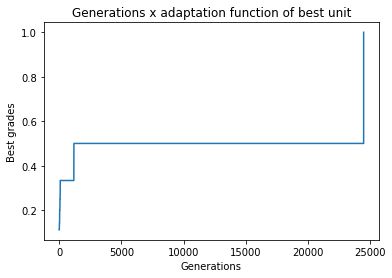

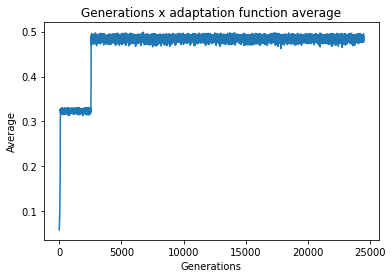

In [ ]:
def aplicaAlgoritmoGenetico(nDamas, tamPopulacao, nGeracoes, probCrossover, probMutacao, usaElitismo):

    geracoesGeradas = 0

    populacaoInicial = geraPopulacaoInicial(nDamas, tamPopulacao)
    melhoresIndividuos = []
    melhoresNotas = []
    mediasIndividuos = []
    melhorNotaAtual = 0

    while melhorNotaAtual != 1.0:

        novaPopulacao = []
        melhorIndividuoAtual, melhorNotaAtual, pos, somasIndividuos = retornaMelhorIndividuo(populacaoInicial)
        melhoresIndividuos.append(melhorIndividuoAtual)
        melhoresNotas.append(melhorNotaAtual)

        mediasIndividuos.append(somasIndividuos / tamPopulacao)

        if usaElitismo:
            
            novaPopulacao.append(melhorIndividuoAtual)
            populacaoInicial.pop(pos)


        populacaoSelecionada = realizaSelecao(populacaoInicial)

        populacaoCrossover = iniciaCrossover(populacaoSelecionada, probCrossover)

        novaPopulacao += realizaMutacao(populacaoCrossover, probMutacao)

        populacaoInicial = novaPopulacao

        geracoesGeradas += 1

    print(geracoesGeradas)       

    return melhoresIndividuos, melhoresNotas, mediasIndividuos


def main():


    global numDamas
    numDamas = 16

    melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(16, 256, 100, 0.75, 0.03, True)

    print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
    x= list(range(0,len(melhoresIndividuos)))
    y= melhoresNotas
    bestUnitPlot(x,y)
    x= list(range(0,len(mediasIndividuos)))
    y= mediasIndividuos
    bestUnitMeanPlot(x, y)


main()

Pode-se ver que foram necessárias 24488 gerações para alcançarmos a solução em uma população com 256 tabuleiros. O equilíbrio populacional foi alcançado na 3000º geração aproximadamente. Podemos observar que a mutação possivelmente gerou a solução, já que estivemos em um máximo local por muito tempo. Ademais, a solução foi encontrada relativamente rápido: em 12 minutos.

Solução final:

[13, 3, 5, 8, 12, 14, 4, 1, 15, 9, 11, 6, 0, 2, 10, 7]


**Deve-se acrescentar 1 aos índices.**

## 32 damas

38415
[25, 17, 1, 8, 12, 14, 6, 22, 9, 31, 0, 15, 29, 24, 28, 7, 4, 13, 20, 2, 30, 3, 11, 21, 27, 18, 23, 5, 19, 10, 16, 26]

1.0


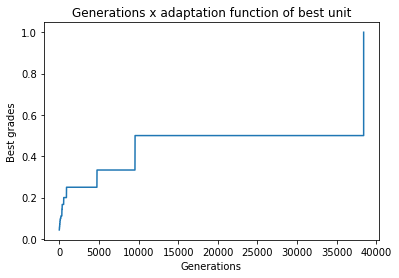

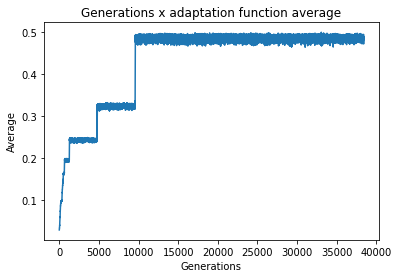

In [ ]:
def aplicaAlgoritmoGenetico(nDamas, tamPopulacao, nGeracoes, probCrossover, probMutacao, usaElitismo):

    geracoesGeradas = 0

    populacaoInicial = geraPopulacaoInicial(nDamas, tamPopulacao)
    melhoresIndividuos = []
    melhoresNotas = []
    mediasIndividuos = []
    melhorNotaAtual = 0

    while melhorNotaAtual != 1.0:

        novaPopulacao = []
        melhorIndividuoAtual, melhorNotaAtual, pos, somasIndividuos = retornaMelhorIndividuo(populacaoInicial)
        melhoresIndividuos.append(melhorIndividuoAtual)
        melhoresNotas.append(melhorNotaAtual)

        mediasIndividuos.append(somasIndividuos / tamPopulacao)

        if usaElitismo:
            
            novaPopulacao.append(melhorIndividuoAtual)
            populacaoInicial.pop(pos)


        populacaoSelecionada = realizaSelecao(populacaoInicial)

        populacaoCrossover = iniciaCrossover(populacaoSelecionada, probCrossover)

        novaPopulacao += realizaMutacao(populacaoCrossover, probMutacao)

        populacaoInicial = novaPopulacao

        geracoesGeradas += 1

    print(geracoesGeradas)       

    return melhoresIndividuos, melhoresNotas, mediasIndividuos


def main():


    global numDamas
    numDamas = 32

    melhoresIndividuos, melhoresNotas, mediasIndividuos = aplicaAlgoritmoGenetico(32, 256, 100, 0.75, 0.03, True)

    print(f"{melhoresIndividuos[-1]}\n\n{melhoresNotas[-1]}")
    x= list(range(0,len(melhoresIndividuos)))
    y= melhoresNotas
    bestUnitPlot(x,y)
    x= list(range(0,len(mediasIndividuos)))
    y= mediasIndividuos
    bestUnitMeanPlot(x, y)


main()

Os gráficos ficaram muito similares ao problema das 16 damas. Encontramos um tabuleiro com apenas um ataque e mantivemos por 20000 gerações aproximadamente. A população se estabilizou perto da 10000ª geração. Novamente, talvez devido à mutação, pudemos encontrar a solução.